# Postprocessing

Section 1 - Import code and make definitions

Section 2 - View the simulations

## Section 1 - Import code and make definitions

### Before running for the first time you will need to execute Code Block 1 in TauP_plots.ipynb

### The simulations are stored at the Zenodo repository https://doi.org/10.5281/zenodo.10631693 

### You will need to extract the simulations and store them in top_dir
### e.g. if you have a folder called 128b_VPREMOON_atten_surface_2 and it is in /Users/cnunn/lunar_data/axisem3d_runs/ then the top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'

In [21]:
# top level dir 

######## 
# Extract the AxiSEM3D runs to a directory and set the top directory HERE 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

In [22]:
# %matplotlib notebook
%matplotlib inline

# calculate the taup models
from obspy.taup import TauPyModel
import time

calculated_VPREMOON = TauPyModel(model='VPREMOON_atten_taup')
calculated_ISSI_M1 = TauPyModel(model='ISSI_MOON_M1_atten_taup')
calculated_VPREMOON_atten_no_LVZ_taup = TauPyModel(model='VPREMOON_atten_no_LVZ_taup')

calculated_taup_dict =	{
  "VPREMOON_taup": calculated_VPREMOON,
  "ISSI_MOON_M1_taup": calculated_ISSI_M1,
    'VPREMOON_atten_no_LVZ_taup':calculated_VPREMOON_atten_no_LVZ_taup
}

from obspy.core import Stream, UTCDateTime
from obspy import read_inventory

from postprocessing_util_observations import get_observations_local
from postprocessing_util import get_all_streams_from_netcdf
from postprocessing_util import plot_epicentral_distance_taup
from postprocessing_util import plot_envelope_taup

phase_list_ISSI = ["P", "PP", "PS", "PSS", "2.15kmps","0.57kmps"]
phase_list_VPREMOON_layered = [
    "P",
    "PS",
    "2.47kmps",
    "0.77kmps",
    "0.47kmps"
]

phase_list_VPREMOON_layered_no_LVZ = [
    "P",
    "PS",
    "2.27kmps",
    "1.66kmps",
    "1.21kmps"
]




distance_examples={
    2:2.167025997371414,
    5:5.075044339909034,
    25:25.432357813795228,
    28:28.047339965833054,
    34:34.560784470873635,
    57:57.67071530277473
}
    
    
# epicentral distances of the events used     
# A13/S-IVB 4.480908613215989
# A14/S-IVB 5.783787517596895
# A15/S-IVB 11.718510058287118
# A15/S-IVB 6.118664372615061
# A16/S-IVB 5.075044339909034
# A16/S-IVB 9.054122437295218
# A16/S-IVB 36.37690556827287
# A17/S-IVB 11.13215379702135
# A17/S-IVB 5.161473408558756
# A17/S-IVB 34.01814904542429
# A17/S-IVB 28.047339965833054
# A12/LM 2.4252731172780972
# A14/LM 3.8036577155384563
# A14/LM 2.167025997371414
# A15/LM 37.23510859020209
# A15/LM 34.560784470873635
# A15/LM 3.0396554713670882
# A17/LM 57.67071530277473
# A17/LM 52.68194068762792
# A17/LM 25.432357813795228
# A17/LM 32.48706382198207


In [23]:
# location of the data 

catalogs=['input_files/Nunn_2024_artificial_impacts_picks.xml']

inv = read_inventory('input_files/local_MSEED/inventory.xml')

In [24]:
# get the observations (this includes using VPREMOON_taup to mark the P and S arrivals)
original_observation_stream_local_MH = get_observations_local(channel='MH*',model_taup=calculated_taup_dict['VPREMOON_taup'],catalog=catalogs[0],inv=inv)

A13/S-IVB 4.480908613215989
A14/S-IVB 5.783787517596895
A15/S-IVB 11.718510058287118
A15/S-IVB 6.118664372615061
A16/S-IVB 5.075044339909034
A16/S-IVB 9.054122437295218
A16/S-IVB 36.37690556827287
A17/S-IVB 11.13215379702135
A17/S-IVB 5.161473408558756
A17/S-IVB 34.01814904542429
A17/S-IVB 28.047339965833054
A12/LM 2.4252731172780972
A14/LM 3.8036577155384563
A14/LM 2.167025997371414
A15/LM 37.23510859020209
A15/LM 34.560784470873635
A15/LM 3.0396554713670882
A17/LM 57.67071530277473
A17/LM 52.68194068762792
A17/LM 25.432357813795228
A17/LM 32.487063821982076


## Section 2 - View the simulations 

In [25]:
original_stream_dict = {}
original_stream_obs_dict = {}

############################################################################
#VPREMOON
############################################################################

############################################################################
# specify a run name
run = '120_VPREMOON_atten_explosion_2'
run_title = "VPREMOON, with attenuation, surface explosion"
short_title = "VPREMOON  V-0"
# model for TauP
model_taup='VPREMOON_taup'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '127w_VPREMOON_atten_linear20_2'
run_title = "VPREMOON, ±50% scatter linear from 0 to 20 km, surface explosion"
short_title = "VPREMOON, ±50% scatter (linear from 0-20 km)  V-1"
# model for TauP
model_taup='VPREMOON_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
for tr in original_stream_run:
    tr.trim(endtime=UTCDateTime(2000))
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '126w_VPREMOON_atten_linear50_2'
run_title = "VPREMOON, ±50% scatter linear from 0 to 50 km, surface explosion"
short_title = "VPREMOON, ±50% scatter (linear from 0-50 km)  V-2"
# model for TauP
model_taup='VPREMOON_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '124w_VPREMOON_atten_linear80_2'
run_title = "VPREMOON, ±50% scatter linear from 0 to 80 km, surface explosion"
short_title = "VPREMOON, ±50% scatter (linear from 0-80 km)  V-3"
# model for TauP
model_taup='VPREMOON_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
for tr in original_stream_run:
    tr.trim(endtime=UTCDateTime(2000))
original_stream_dict[run] =  original_stream_run


############################################################################

# specify a run name
run = '128b_VPREMOON_atten_surface_2'
run_title = "VPREMOON, 4% surface topography, surface explosion"
short_title = 'VPREMOON, 4% surface topography  V-4'
# model for TauP
model_taup='VPREMOON_taup'
# failed with a memory issue - use first 1700 s. 

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
for tr in original_stream_run:
    tr.trim(endtime=UTCDateTime(1700))
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '125_VPREMOON_atten_Moho_2'
run_title = "VPREMOON, Moho topography from Wieczorek et al., 2013, surface explosion"
short_title = "VPREMOON, Moho topography  V-5" 
# model for TauP
model_taup='VPREMOON_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '152we_VPREMOON_atten_combi_50_2'
run_title = "VPREMOON, 4% surface topopgraphy, 100% Moho topography, ±50% scatter linear from 0 to 50 km, surface explosion"
short_title = 'VPREMOON, combination  V-6'
# model for TauP
model_taup='VPREMOON_taup'
# unstable after 2900 s 

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])

original_stream_dict[run] =  original_stream_run


############################################################################
#ISSI M1
############################################################################

############################################################################
# specify a run name
run = '141_ISSI_atten_explosion_2'
run_title = "ISSI M1, with attenuation, surface explosion"
short_title = "M1  M-0"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '146we_ISSI_atten_linear20_2'
run_title = "ISSI M1, ±50% scatter linear from 0 to 20 km, surface explosion"
short_title = "M1, ±50% scatter (linear from 0-20 km)  M-1"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '145we_ISSI_atten_linear50_2'
run_title = "ISSI M1, ±50% scatter linear from 0 to 50 km, surface explosion"
short_title = "M1, ±50% scatter (linear from 0-50 km)  M-2"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '140we_ISSI_atten_linear80_2'
run_title = "ISSI M1, ±50% scatter linear from 0 to 80 km, surface explosion"
short_title = "M1, ±50% scatter (linear from 0-80 km)  M-3"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '148_ISSI_atten_surface_2'
run_title = "ISSI M1, surface topography, surface explosion"
short_title = "M1, 4% surface topography  M-4"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '147_ISSI_atten_Moho_2'
run_title = "ISSI M1, 20% Moho topography, surface explosion"
short_title = "M1, 20% Moho topography  M-5"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run


############################################################################
# specify a run name
run = '166w_ISSI_atten_combi_50_nr_100_constant_2'
run_title = "ISSI M1, surface topography, 20% Moho topography, ±50% scatter linear from 0 to 50 km, surface explosion"
short_title = "M1, combination  M-6"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
#VPREMOON (NO LVZ)
############################################################################

############################################################################


# specify a run name
run = '135_VPREMOON_atten_no_LVZ_2'
short_title = "VPREMOON (no LVZ)  VL0"
run_title = "VPREMOON without LVZ, surface explosion"
short_title = ''
# model for TauP
model_taup='VPREMOON_atten_no_LVZ_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
print('Models read in')



Min/Max R -1.7682369 2.3789287
Min/Max Z -2.966478 11542.449
Min/Max R -351449020.0 442567940.0
Min/Max T -399666700.0 457223230.0
Min/Max Z -296693440.0 310329250.0
Min/Max R -0.5099962 1796.5557
Min/Max T -957.8617 90.102715
Min/Max Z -0.76259214 6403.021
Min/Max R -1682933900.0 2105170600.0
Min/Max T -1585012400.0 1588840200.0
Min/Max Z -790698700.0 1048339000.0
Min/Max R -616380400000000.0 442794320000000.0
Min/Max T -192019500000000.0 270256340000000.0
Min/Max Z -17943070000000.0 26106646000000.0
Min/Max R -61.83381 54.106308
Min/Max T -77.53625 86.93062
Min/Max Z -2.7161646 14910.24
Min/Max R -594178.06 204993.52
Min/Max T -270616.94 111073.164
Min/Max Z -29188.143 8361.884
Min/Max R -0.021632634 0.023049988
Min/Max Z -0.103238925 30.885838
Min/Max R -1.0127435 0.40028137
Min/Max T -2.5093281 0.7184974
Min/Max Z -0.010878619 20.787994
Min/Max R -2.577415 1.2928319
Min/Max T -1.341222 1.2182254
Min/Max Z -0.007234675 17.365479
Min/Max R -1.1722046 0.79189533
Min/Max T -2.1907275 2

30
Z
30 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.824240Z - 1970-01-01T01:00:09.826480Z | 4.1 Hz, 14835 samples
...
(28 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.824240Z - 1970-01-01T01:00:09.826480Z | 4.1 Hz, 14835 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872787086
L4 121.27245774557377
L8 242.54491549114792
L12 363.81737323672206
L16 485.08983098229584
L20 606.3622887278701
L24 727.6347464734438
L28 848.9072042190181
L32 970.1796619645919
L36 1091.4521197101662
L40 1212.7245774557402
L44 1333.9970352013142
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.8144084380358
event_depth=0
CURRENT RUN: 120_VPREMOON_atten_explosion_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz
temp/fig_2024-09-12T00:50:23.571106Z.png


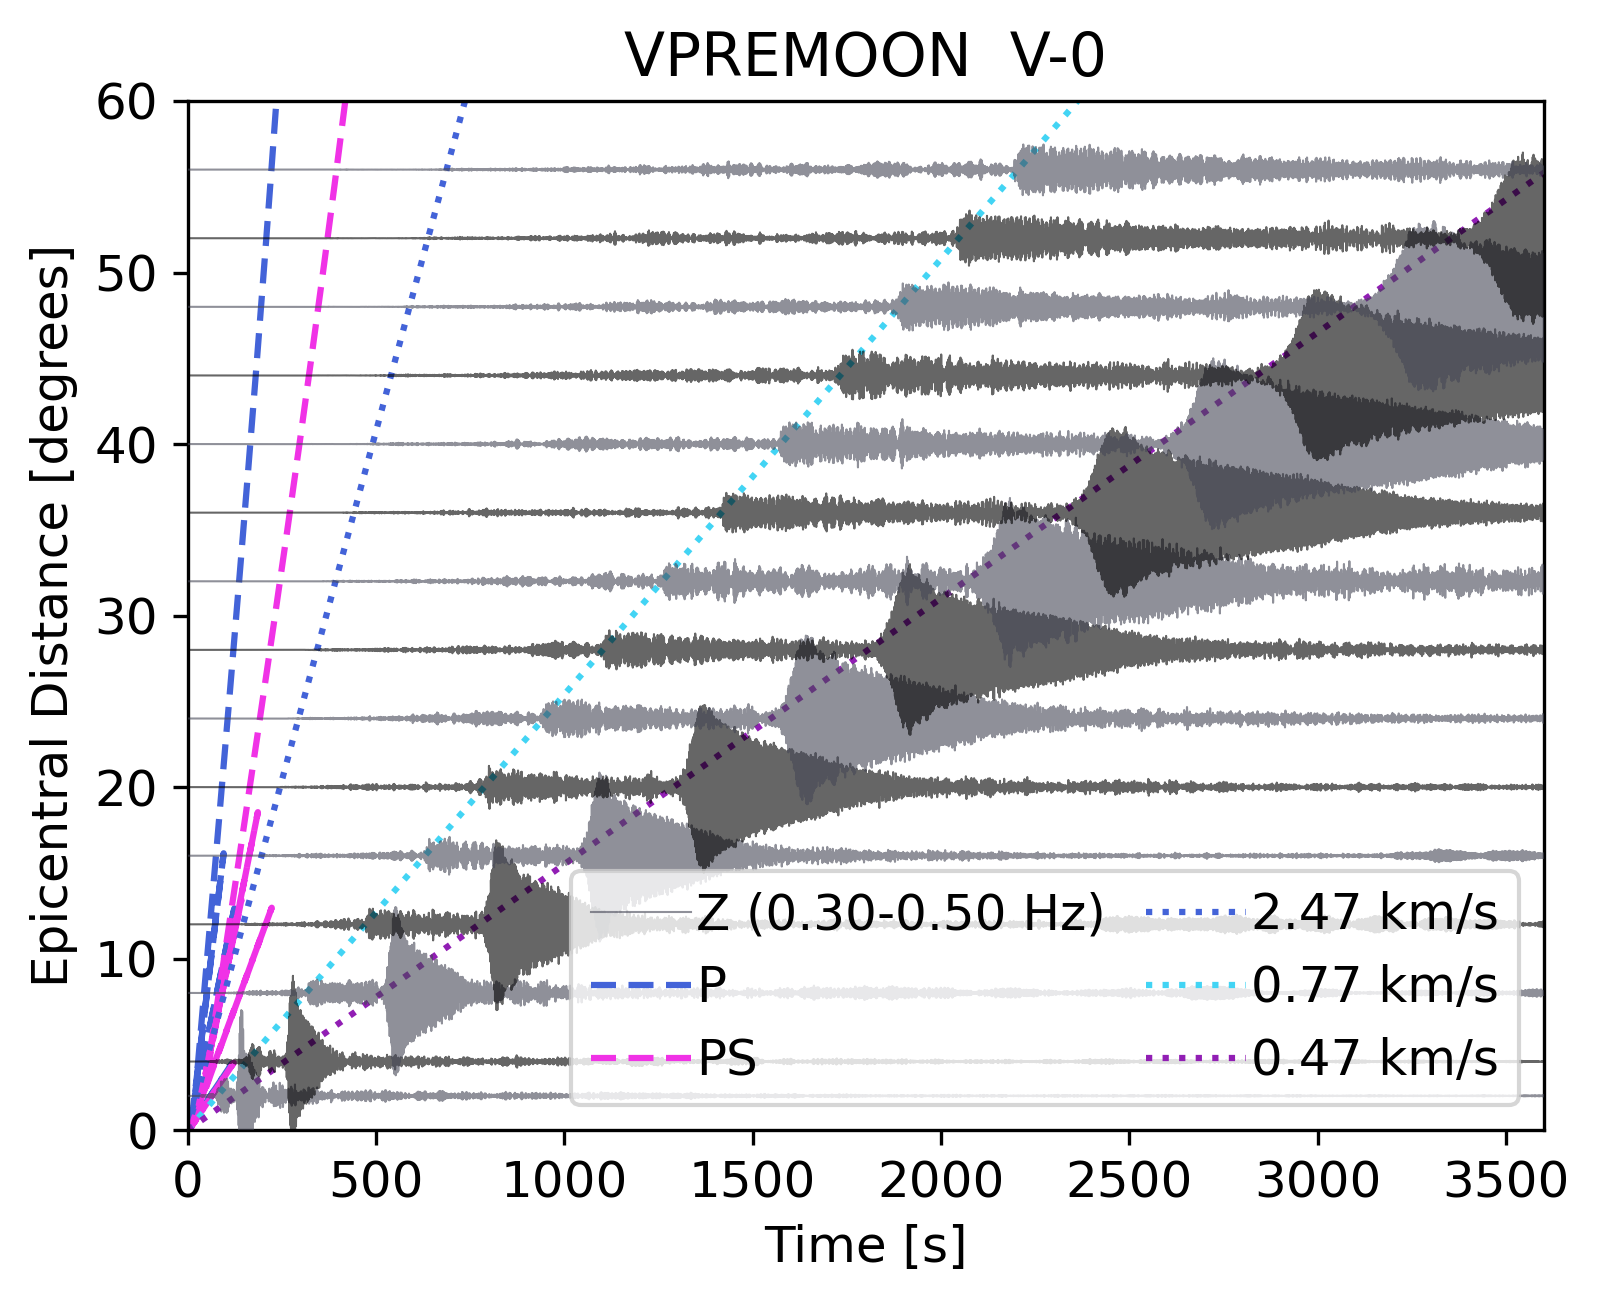

15 Trace(s) in Stream:
LO.L2..Z  | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L4..Z  | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L8..Z  | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L12..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L16..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L20..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L24..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L28..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L32..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L36..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L40..Z | 1970-01-01T00:00:00.06760

In [26]:
# Figure 4(right) - Simulations - 120_VPREMOON_atten_explosion_2

# specify a run name
run = '120_VPREMOON_atten_explosion_2'
short_title = "VPREMOON  V-0"
run_title = "VPREMOON, with attenuation, surface explosion"
# model for TauP
model_taup='VPREMOON_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))
            
scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,1,1,0.3
             ]




plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=5,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=3600,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=phase_list_VPREMOON_layered, raw=False, 
#                               pre_filt_env=[[0.05,0.1,0.5,0.75]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=True,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',
                             )

30
Z
30 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.824240Z - 1970-01-01T01:00:09.826480Z | 4.1 Hz, 14835 samples
...
(28 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.824240Z - 1970-01-01T01:00:09.826480Z | 4.1 Hz, 14835 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872787086
L4 121.27245774557377
L8 242.54491549114792
L12 363.81737323672206
L16 485.08983098229584
L20 606.3622887278701
L24 727.6347464734438
L28 848.9072042190181
L32 970.1796619645919
L36 1091.4521197101662
L40 1212.7245774557402
L44 1333.9970352013142
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.8144084380358
event_depth=0
CURRENT RUN: 120_VPREMOON_atten_explosion_2
Normalized to amplitude of first arrivals
Bandpass filtered between 0.30 and 0.50 Hz
temp/fig_2024-09-12T00:50:24.118758Z.png


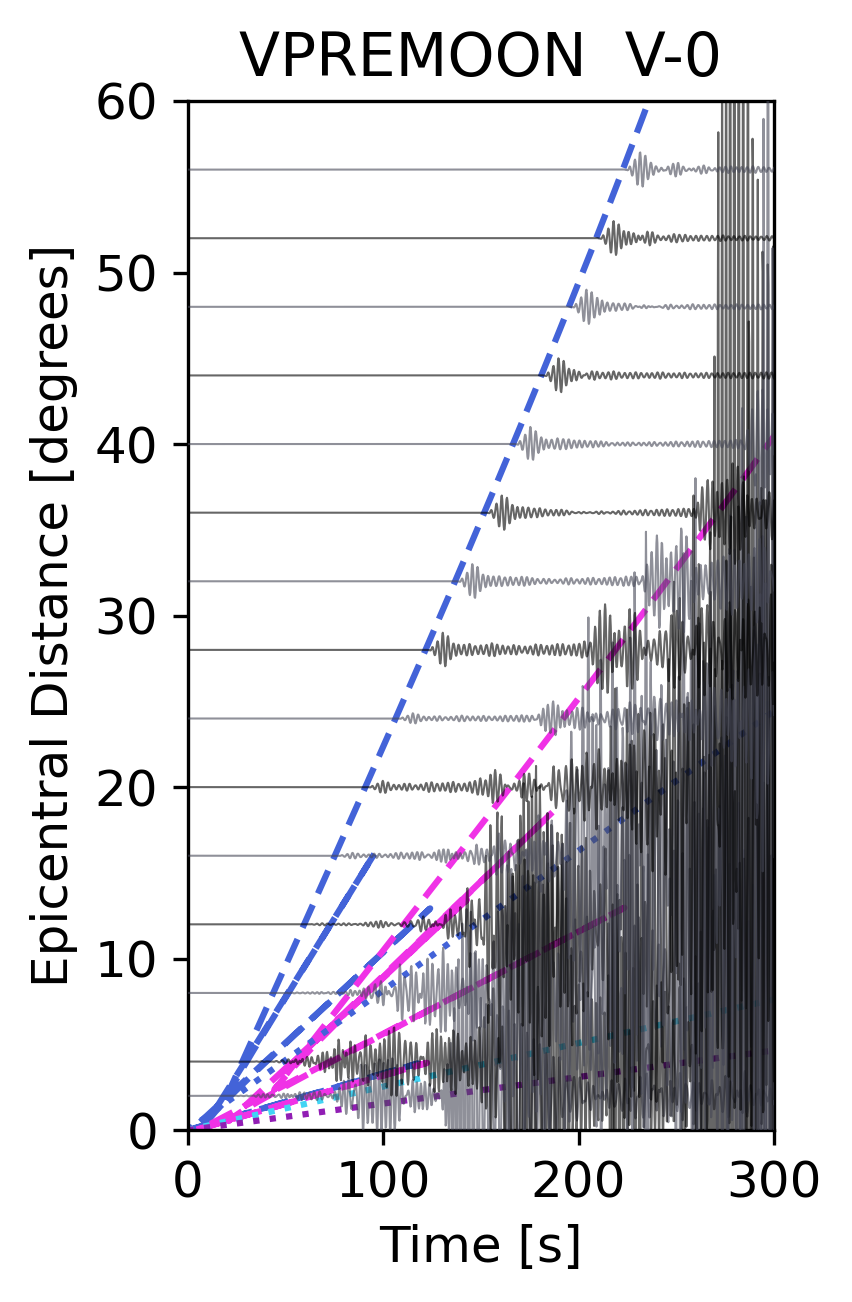

15 Trace(s) in Stream:
LO.L2..Z  | 1970-01-01T00:00:00.067600Z - 1970-01-01T00:04:59.887120Z | 4.1 Hz, 1233 samples
LO.L4..Z  | 1970-01-01T00:00:00.067600Z - 1970-01-01T00:04:59.887120Z | 4.1 Hz, 1233 samples
LO.L8..Z  | 1970-01-01T00:00:00.067600Z - 1970-01-01T00:04:59.887120Z | 4.1 Hz, 1233 samples
LO.L12..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T00:04:59.887120Z | 4.1 Hz, 1233 samples
LO.L16..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T00:04:59.887120Z | 4.1 Hz, 1233 samples
LO.L20..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T00:04:59.887120Z | 4.1 Hz, 1233 samples
LO.L24..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T00:04:59.887120Z | 4.1 Hz, 1233 samples
LO.L28..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T00:04:59.887120Z | 4.1 Hz, 1233 samples
LO.L32..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T00:04:59.887120Z | 4.1 Hz, 1233 samples
LO.L36..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T00:04:59.887120Z | 4.1 Hz, 1233 samples
LO.L40..Z | 1970-01-01T00:00:00.067600Z - 1970-

In [27]:
# Figure 4(left) - Simulations - close up - 120_VPREMOON_atten_explosion_2

# specify a run name
run = '120_VPREMOON_atten_explosion_2'
short_title = "VPREMOON  V-0"
run_title = "VPREMOON, with attenuation, surface explosion"
# model for TauP
model_taup='VPREMOON_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))
            
scale_list = [
        2,2,2,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]


plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=1,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=300,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='PP_arrival', phase_list=phase_list_VPREMOON_layered, raw=False, 
#                               pre_filt_env=[[0.05,0.1,0.5,0.75]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=True,
                              catalogs=None,seismograms_vertical=False,figsize=(3, 4.5),show_legend=False,
                             )

45
Z
45 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.734410Z - 1970-01-01T01:00:09.960570Z | 4.1 Hz, 14727 samples
...
(43 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.734410Z - 1970-01-01T01:00:09.960570Z | 4.1 Hz, 14727 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872787086
L4 121.27245774557377
L8 242.54491549114792
L12 363.81737323672206
L16 485.08983098229584
L20 606.3622887278701
L24 727.6347464734438
L28 848.9072042190181
L32 970.1796619645919
L36 1091.4521197101662
L40 1212.7245774557402
L44 1333.9970352013142
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.8144084380358
event_depth=0
CURRENT RUN: 135_VPREMOON_atten_no_LVZ_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz
temp/fig_2024-09-12T00:50:24.409136Z.png


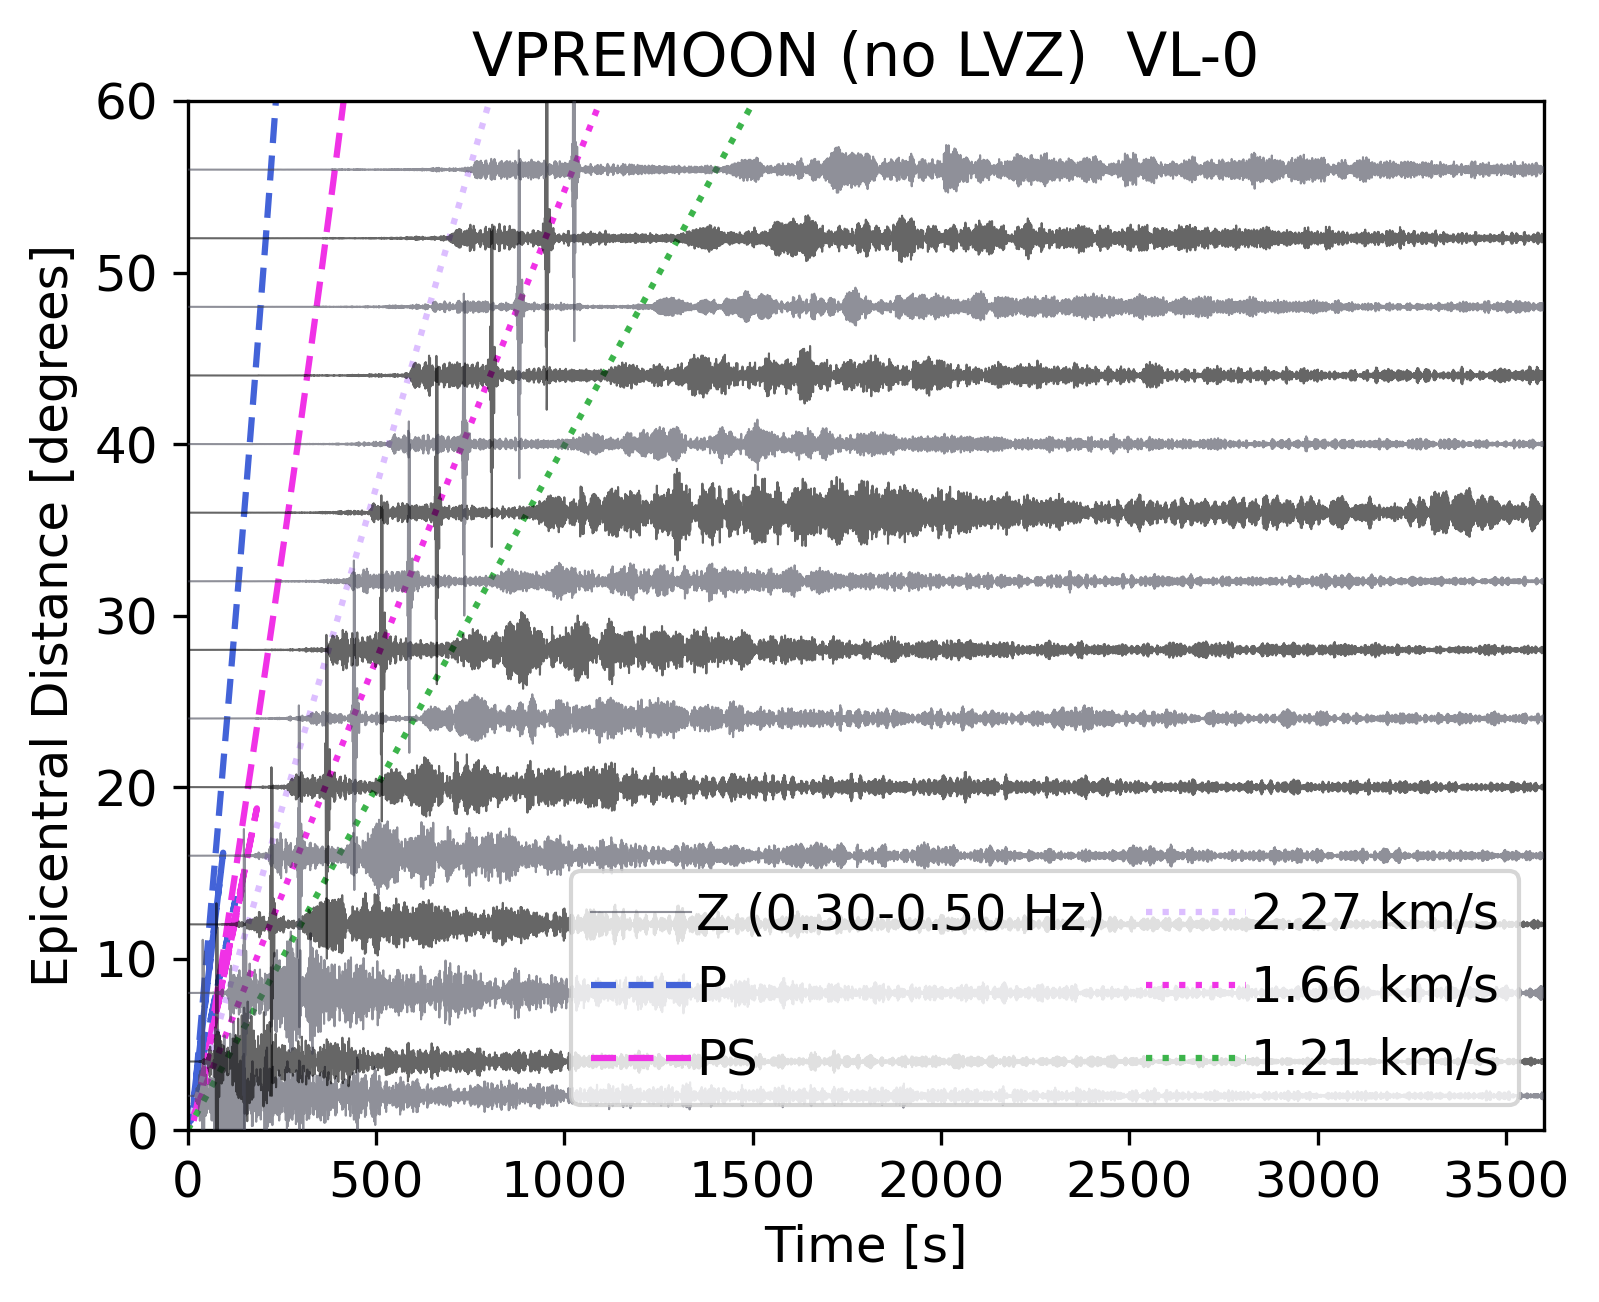

15 Trace(s) in Stream:
LO.L2..Z  | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L4..Z  | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L8..Z  | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L12..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L16..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L20..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L24..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L28..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L32..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L36..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L40..Z | 1969-12-31T23:59:59.97957

In [28]:
# Figure 5(right) - Simulations - 135_VPREMOON_atten_no_LVZ_2

# specify a run name
run = '135_VPREMOON_atten_no_LVZ_2'
short_title = "VPREMOON (no LVZ)  VL-0"
run_title = "VPREMOON without LVZ, surface explosion"
# model for TauP
model_taup='VPREMOON_atten_no_LVZ_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))
            
scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]


plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=10,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=3600,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=phase_list_VPREMOON_layered_no_LVZ, raw=False, 
#                               pre_filt_env=[[0.05,0.1,0.5,0.75]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=True,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',
                             )

45
Z
45 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.734410Z - 1970-01-01T01:00:09.960570Z | 4.1 Hz, 14727 samples
...
(43 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.734410Z - 1970-01-01T01:00:09.960570Z | 4.1 Hz, 14727 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872787086
L4 121.27245774557377
L8 242.54491549114792
L12 363.81737323672206
L16 485.08983098229584
L20 606.3622887278701
L24 727.6347464734438
L28 848.9072042190181
L32 970.1796619645919
L36 1091.4521197101662
L40 1212.7245774557402
L44 1333.9970352013142
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.8144084380358
event_depth=0
CURRENT RUN: 135_VPREMOON_atten_no_LVZ_2
Normalized to amplitude of first arrivals
Bandpass filtered between 0.30 and 0.50 Hz
temp/fig_2024-09-12T00:50:24.920436Z.png


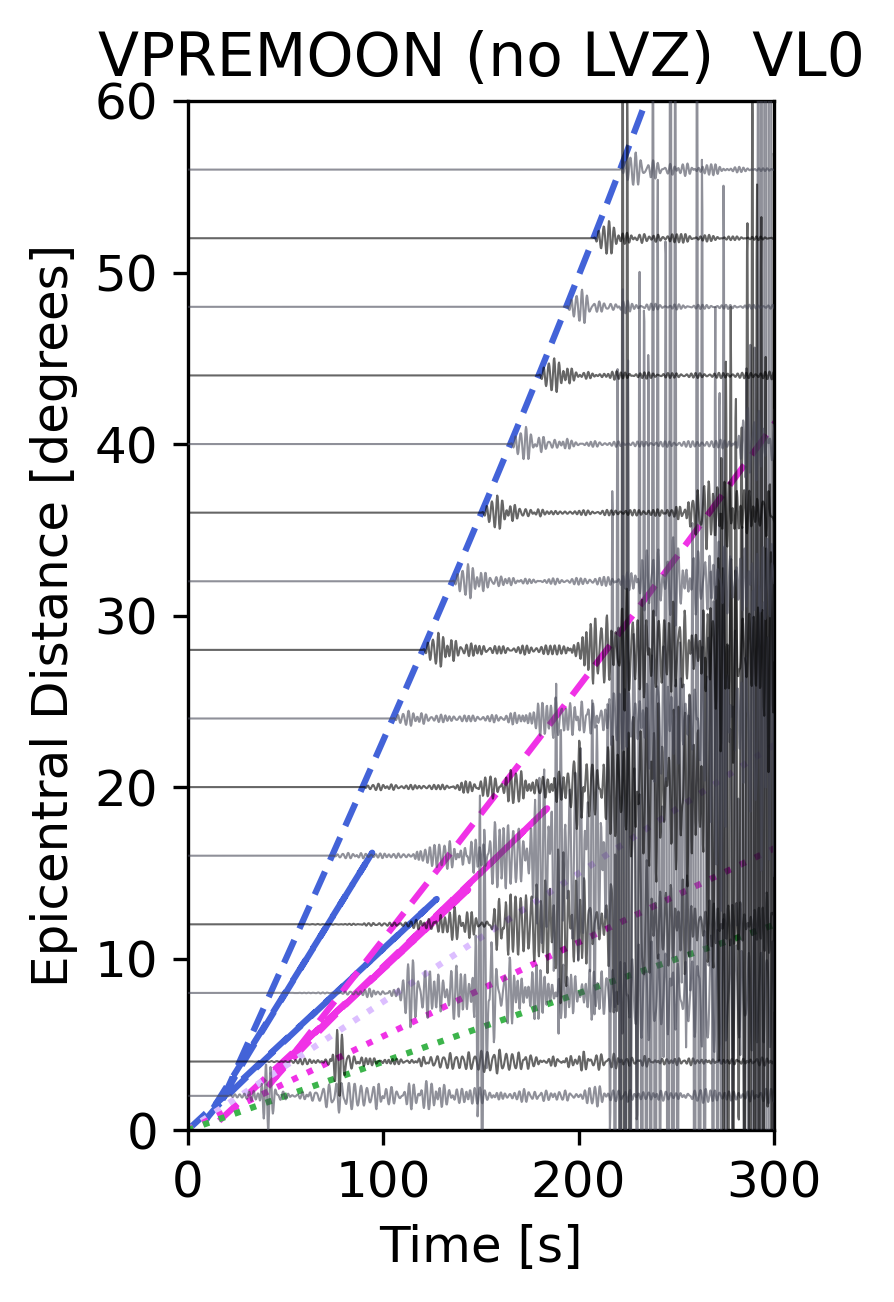

15 Trace(s) in Stream:
LO.L2..Z  | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:05:00.055410Z | 4.1 Hz, 1225 samples
LO.L4..Z  | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:05:00.055410Z | 4.1 Hz, 1225 samples
LO.L8..Z  | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:05:00.055410Z | 4.1 Hz, 1225 samples
LO.L12..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:05:00.055410Z | 4.1 Hz, 1225 samples
LO.L16..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:05:00.055410Z | 4.1 Hz, 1225 samples
LO.L20..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:05:00.055410Z | 4.1 Hz, 1225 samples
LO.L24..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:05:00.055410Z | 4.1 Hz, 1225 samples
LO.L28..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:05:00.055410Z | 4.1 Hz, 1225 samples
LO.L32..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:05:00.055410Z | 4.1 Hz, 1225 samples
LO.L36..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:05:00.055410Z | 4.1 Hz, 1225 samples
LO.L40..Z | 1969-12-31T23:59:59.979570Z - 1970-

In [29]:
# Figure 5(left) - Simulations - close up - 135_VPREMOON_atten_no_LVZ_2

# specify a run name
run = '135_VPREMOON_atten_no_LVZ_2'
short_title = "VPREMOON (no LVZ)  VL0"
run_title = "VPREMOON without LVZ, surface explosion"
# model for TauP
model_taup='VPREMOON_atten_no_LVZ_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))
            
scale_list = [
        2,2,2,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]


plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=1,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=300,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='PP_arrival', phase_list=phase_list_VPREMOON_layered_no_LVZ, raw=False, 
#                               pre_filt_env=[[0.05,0.1,0.5,0.75]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=True,
                              catalogs=None,seismograms_vertical=False,figsize=(3, 4.5),show_legend=False,
                             )

30
Z
30 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.847250Z - 1970-01-01T01:00:09.799750Z | 4.1 Hz, 14631 samples
...
(28 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.847250Z - 1970-01-01T01:00:09.799750Z | 4.1 Hz, 14631 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872787086
L4 121.27245774557377
L8 242.54491549114792
L12 363.81737323672206
L16 485.08983098229584
L20 606.3622887278701
L24 727.6347464734438
L28 848.9072042190181
L32 970.1796619645919
L36 1091.4521197101662
L40 1212.7245774557402
L44 1333.9970352013142
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.8144084380358
event_depth=0
CURRENT RUN: 141_ISSI_atten_explosion_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz
temp/fig_2024-09-12T00:50:25.249403Z.png


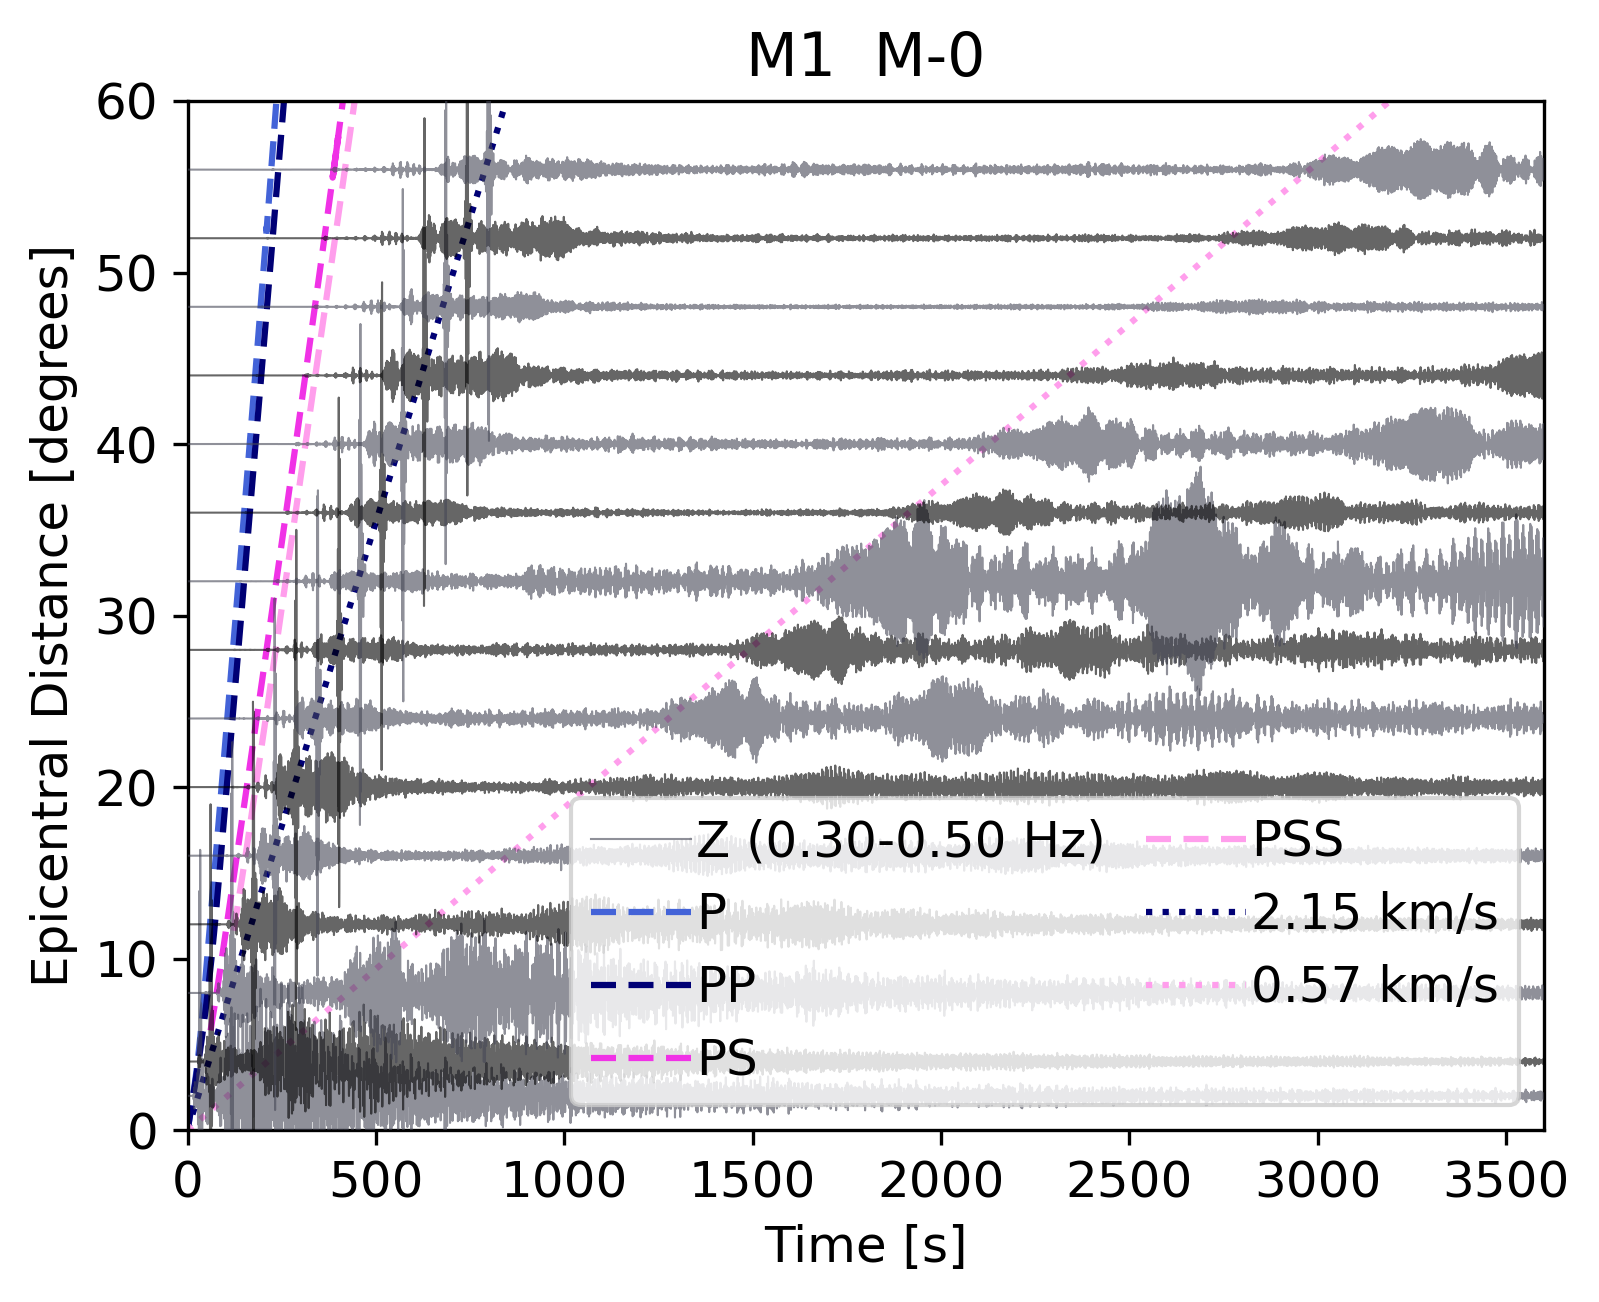

15 Trace(s) in Stream:
LO.L2..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L4..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L8..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L12..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L16..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L20..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L24..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L28..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L32..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L36..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L40..Z | 1970-01-01T00:00:00.09400

In [30]:
# Figure 6(right) - Simulations - 141_ISSI_atten_explosion_2

############################################################################
# specify a run name
run = '141_ISSI_atten_explosion_2'
run_title = "ISSI M1, with attenuation, surface explosion"
short_title = "M1  M-0"
# model for TauP
model_taup='ISSI_MOON_M1_taup'



freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))
            
scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,1,1,1.2
             ]


plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=15,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=3600,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=phase_list_ISSI, raw=False, 
#                               pre_filt_env=[[0.05,0.1,0.5,0.75]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=True,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',
                             )

30
Z
30 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.847250Z - 1970-01-01T01:00:09.799750Z | 4.1 Hz, 14631 samples
...
(28 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.847250Z - 1970-01-01T01:00:09.799750Z | 4.1 Hz, 14631 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872787086
L4 121.27245774557377
L8 242.54491549114792
L12 363.81737323672206
L16 485.08983098229584
L20 606.3622887278701
L24 727.6347464734438
L28 848.9072042190181
L32 970.1796619645919
L36 1091.4521197101662
L40 1212.7245774557402
L44 1333.9970352013142
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.8144084380358
event_depth=0
CURRENT RUN: 141_ISSI_atten_explosion_2
Normalized to amplitude of first arrivals
Bandpass filtered between 0.30 and 0.50 Hz
temp/fig_2024-09-12T00:50:25.801447Z.png


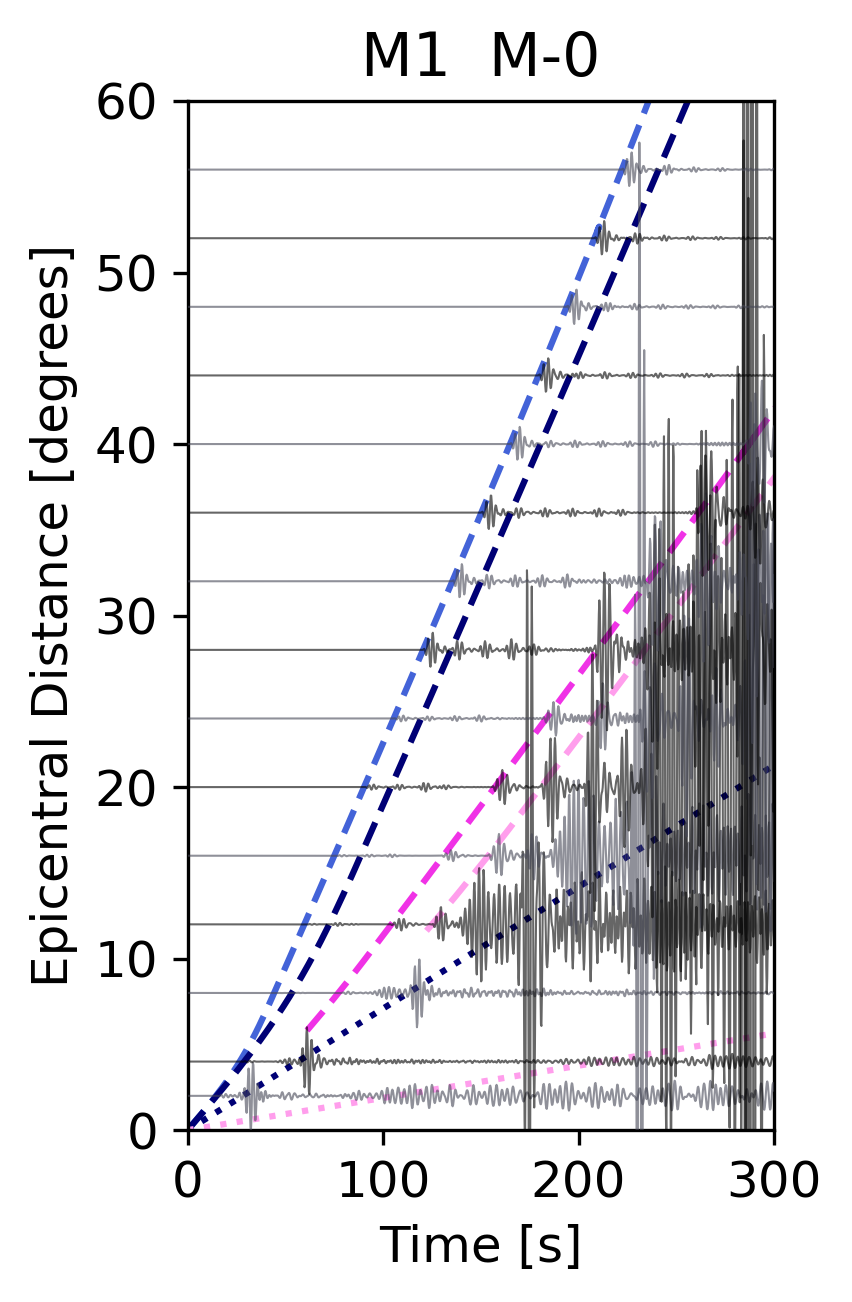

15 Trace(s) in Stream:
LO.L2..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:04:59.895250Z | 4.1 Hz, 1216 samples
LO.L4..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:04:59.895250Z | 4.1 Hz, 1216 samples
LO.L8..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:04:59.895250Z | 4.1 Hz, 1216 samples
LO.L12..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:04:59.895250Z | 4.1 Hz, 1216 samples
LO.L16..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:04:59.895250Z | 4.1 Hz, 1216 samples
LO.L20..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:04:59.895250Z | 4.1 Hz, 1216 samples
LO.L24..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:04:59.895250Z | 4.1 Hz, 1216 samples
LO.L28..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:04:59.895250Z | 4.1 Hz, 1216 samples
LO.L32..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:04:59.895250Z | 4.1 Hz, 1216 samples
LO.L36..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:04:59.895250Z | 4.1 Hz, 1216 samples
LO.L40..Z | 1970-01-01T00:00:00.094000Z - 1970-

In [31]:
# Figure 6(left) - Simulations - close up - 141_ISSI_atten_explosion_2

############################################################################
# specify a run name
run = '141_ISSI_atten_explosion_2'
run_title = "ISSI M1, with attenuation, surface explosion"
short_title = "M1  M-0"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))
            
scale_list = [
        2,2,2,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]

plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=1,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=300,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='PP_arrival', phase_list=phase_list_ISSI, raw=False, 
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=True,
                              catalogs=None,seismograms_vertical=False,figsize=(3, 4.5),show_legend=False,
                             )

Z
0 Trace(s) in Stream:

event_depth=0
Normalized to amplitude of first arrivals
Bandpass filtered between 0.30 and 0.50 Hz
temp/fig_2024-09-12T00:50:26.026151Z.png


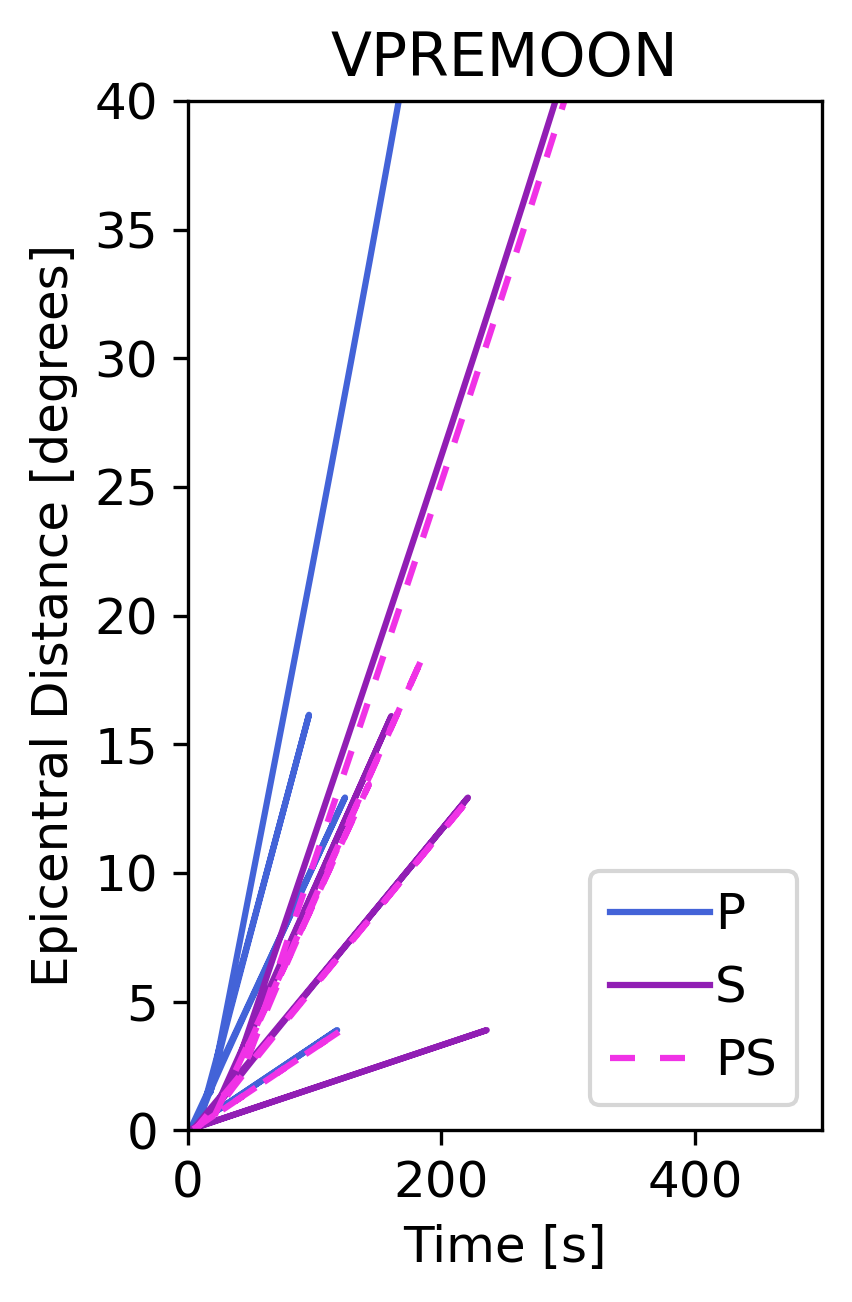

Z
0 Trace(s) in Stream:

event_depth=0
Normalized to amplitude of first arrivals
Bandpass filtered between 0.30 and 0.50 Hz
temp/fig_2024-09-12T00:50:26.199650Z.png


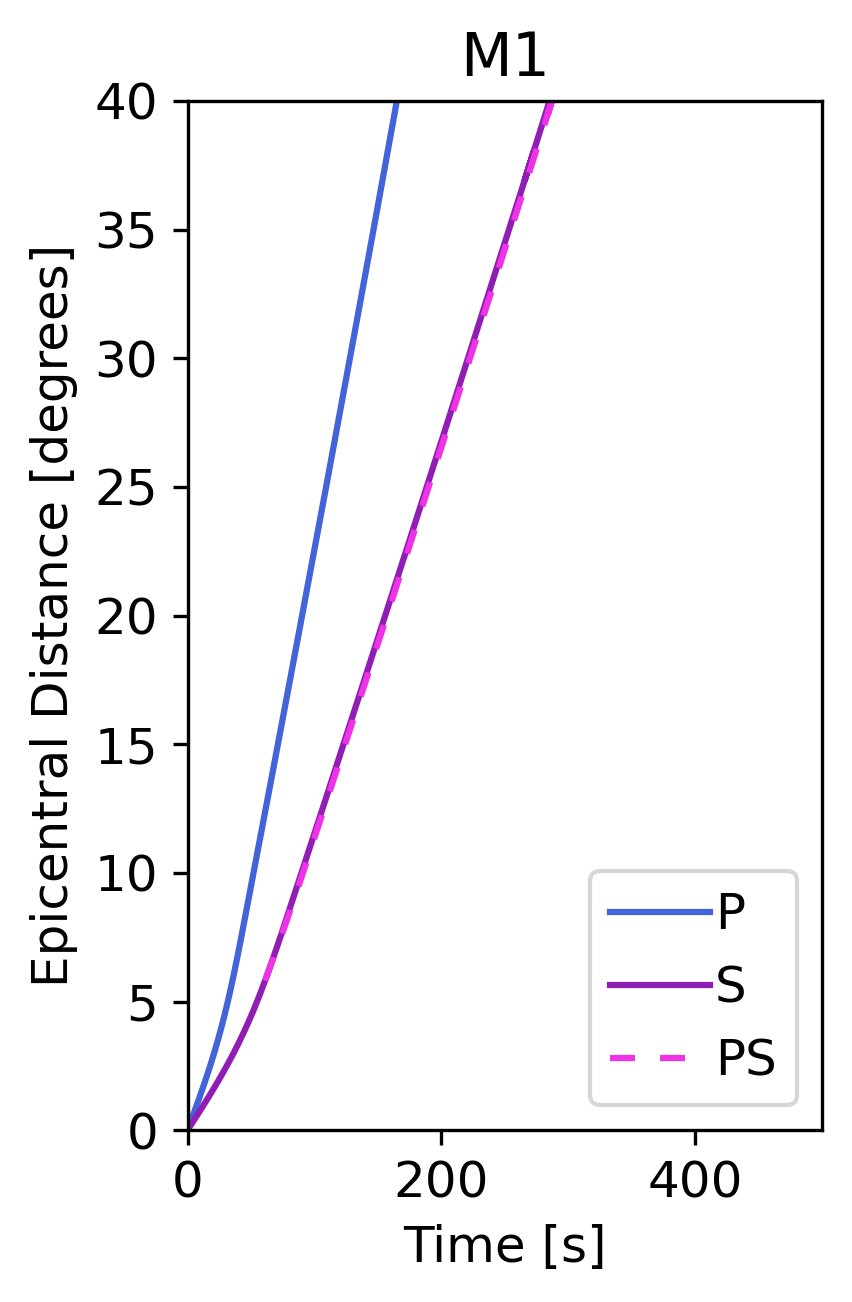

0 Trace(s) in Stream:


In [32]:
# Figure 7 - Seismic phases calculated using TauP

# specify a run name
run = '120_VPREMOON_atten_explosion_2'
short_title = 'VPREMOON'
run_title = "VPREMOON, with attenuation, surface explosion"
# model for TauP
model_taup='VPREMOON_taup'

freqmin=0.3
freqmax=0.5

plot_epicentral_distance_taup(original_stream=Stream(),inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict['VPREMOON_taup'],
                                                            just_taup=True, 
                         title='VPREMOON',freqmin=freqmin,freqmax=freqmax,scale=1,scale_list=None,taup_height=0.25,
                         startsecond=0, endsecond=500,observations=False, channel='Z', degree_min=0, 
                              degree_max=40, normalize='PP_arrival', phase_list=["P","S","PS"], raw=False, 
#                               pre_filt_env=[[0.05,0.1,0.5,0.75]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=True,
                              catalogs=None,seismograms_vertical=False,figsize=(3, 4.5),show_legend=True,legend_loc='lower right',ncol=1
                             )


plot_epicentral_distance_taup(original_stream=Stream(),inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],
                              just_taup=True, 
                         title='M1',freqmin=freqmin,freqmax=freqmax,scale=1,scale_list=None,taup_height=0.25,
                         startsecond=0, endsecond=500,observations=False, channel='Z', degree_min=0, 
                              degree_max=40, normalize='PP_arrival', phase_list=["P","S","PS"], raw=False, 
#                               pre_filt_env=[[0.05,0.1,0.5,0.75]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=True,
                              catalogs=None,seismograms_vertical=False,figsize=(3, 4.5),show_legend=True,legend_loc='lower right',ncol=1
                             )

In [33]:

# For figures 9, 10, 11 and 12, I first adjusted the scales manually until they looked reasonable - 
# see most of the features without overlapping too much with the other simulations. 
# I then used the calculation below to get the scales to round numbers. 
# Scale is relative to the first simulation in the list. 

t0 = 0.01935147096864843
t_scale = 1.5
target_scale = 30
tx = 0.00044044426938636544
print(target_scale/(t0/tx)*t_scale)

1.0242111390135185


Calculated using model :  Model M1
Observations: smooth_periods=10, smooth_kernel_size=166 smoothing length=25.1 s
0 0.002879958527331511
Simulation: 120_VPREMOON_atten_explosion_2, smooth_periods=10, smooth_kernel_size=103 smoothing length=25.1 s
plot envelope  1.0
1 0.0004053020498107399
Simulation: 127w_VPREMOON_atten_linear20_2, smooth_periods=10, smooth_kernel_size=114 smoothing length=27.7 s
plot envelope  1.0
2 0.00032463339707246275
Simulation: 126w_VPREMOON_atten_linear50_2, smooth_periods=10, smooth_kernel_size=108 smoothing length=26.3 s
plot envelope  1.0
3 0.0003606396803791821
Simulation: 124w_VPREMOON_atten_linear80_2, smooth_periods=10, smooth_kernel_size=111 smoothing length=27.0 s
plot envelope  1.0
4 0.0008627654629383165
Simulation: 128b_VPREMOON_atten_surface_2, smooth_periods=10, smooth_kernel_size=102 smoothing length=24.8 s
plot envelope  1.0
5 0.002967400288995343
Simulation: 125_VPREMOON_atten_Moho_2, smooth_periods=10, smooth_kernel_size=102 smoothing length=

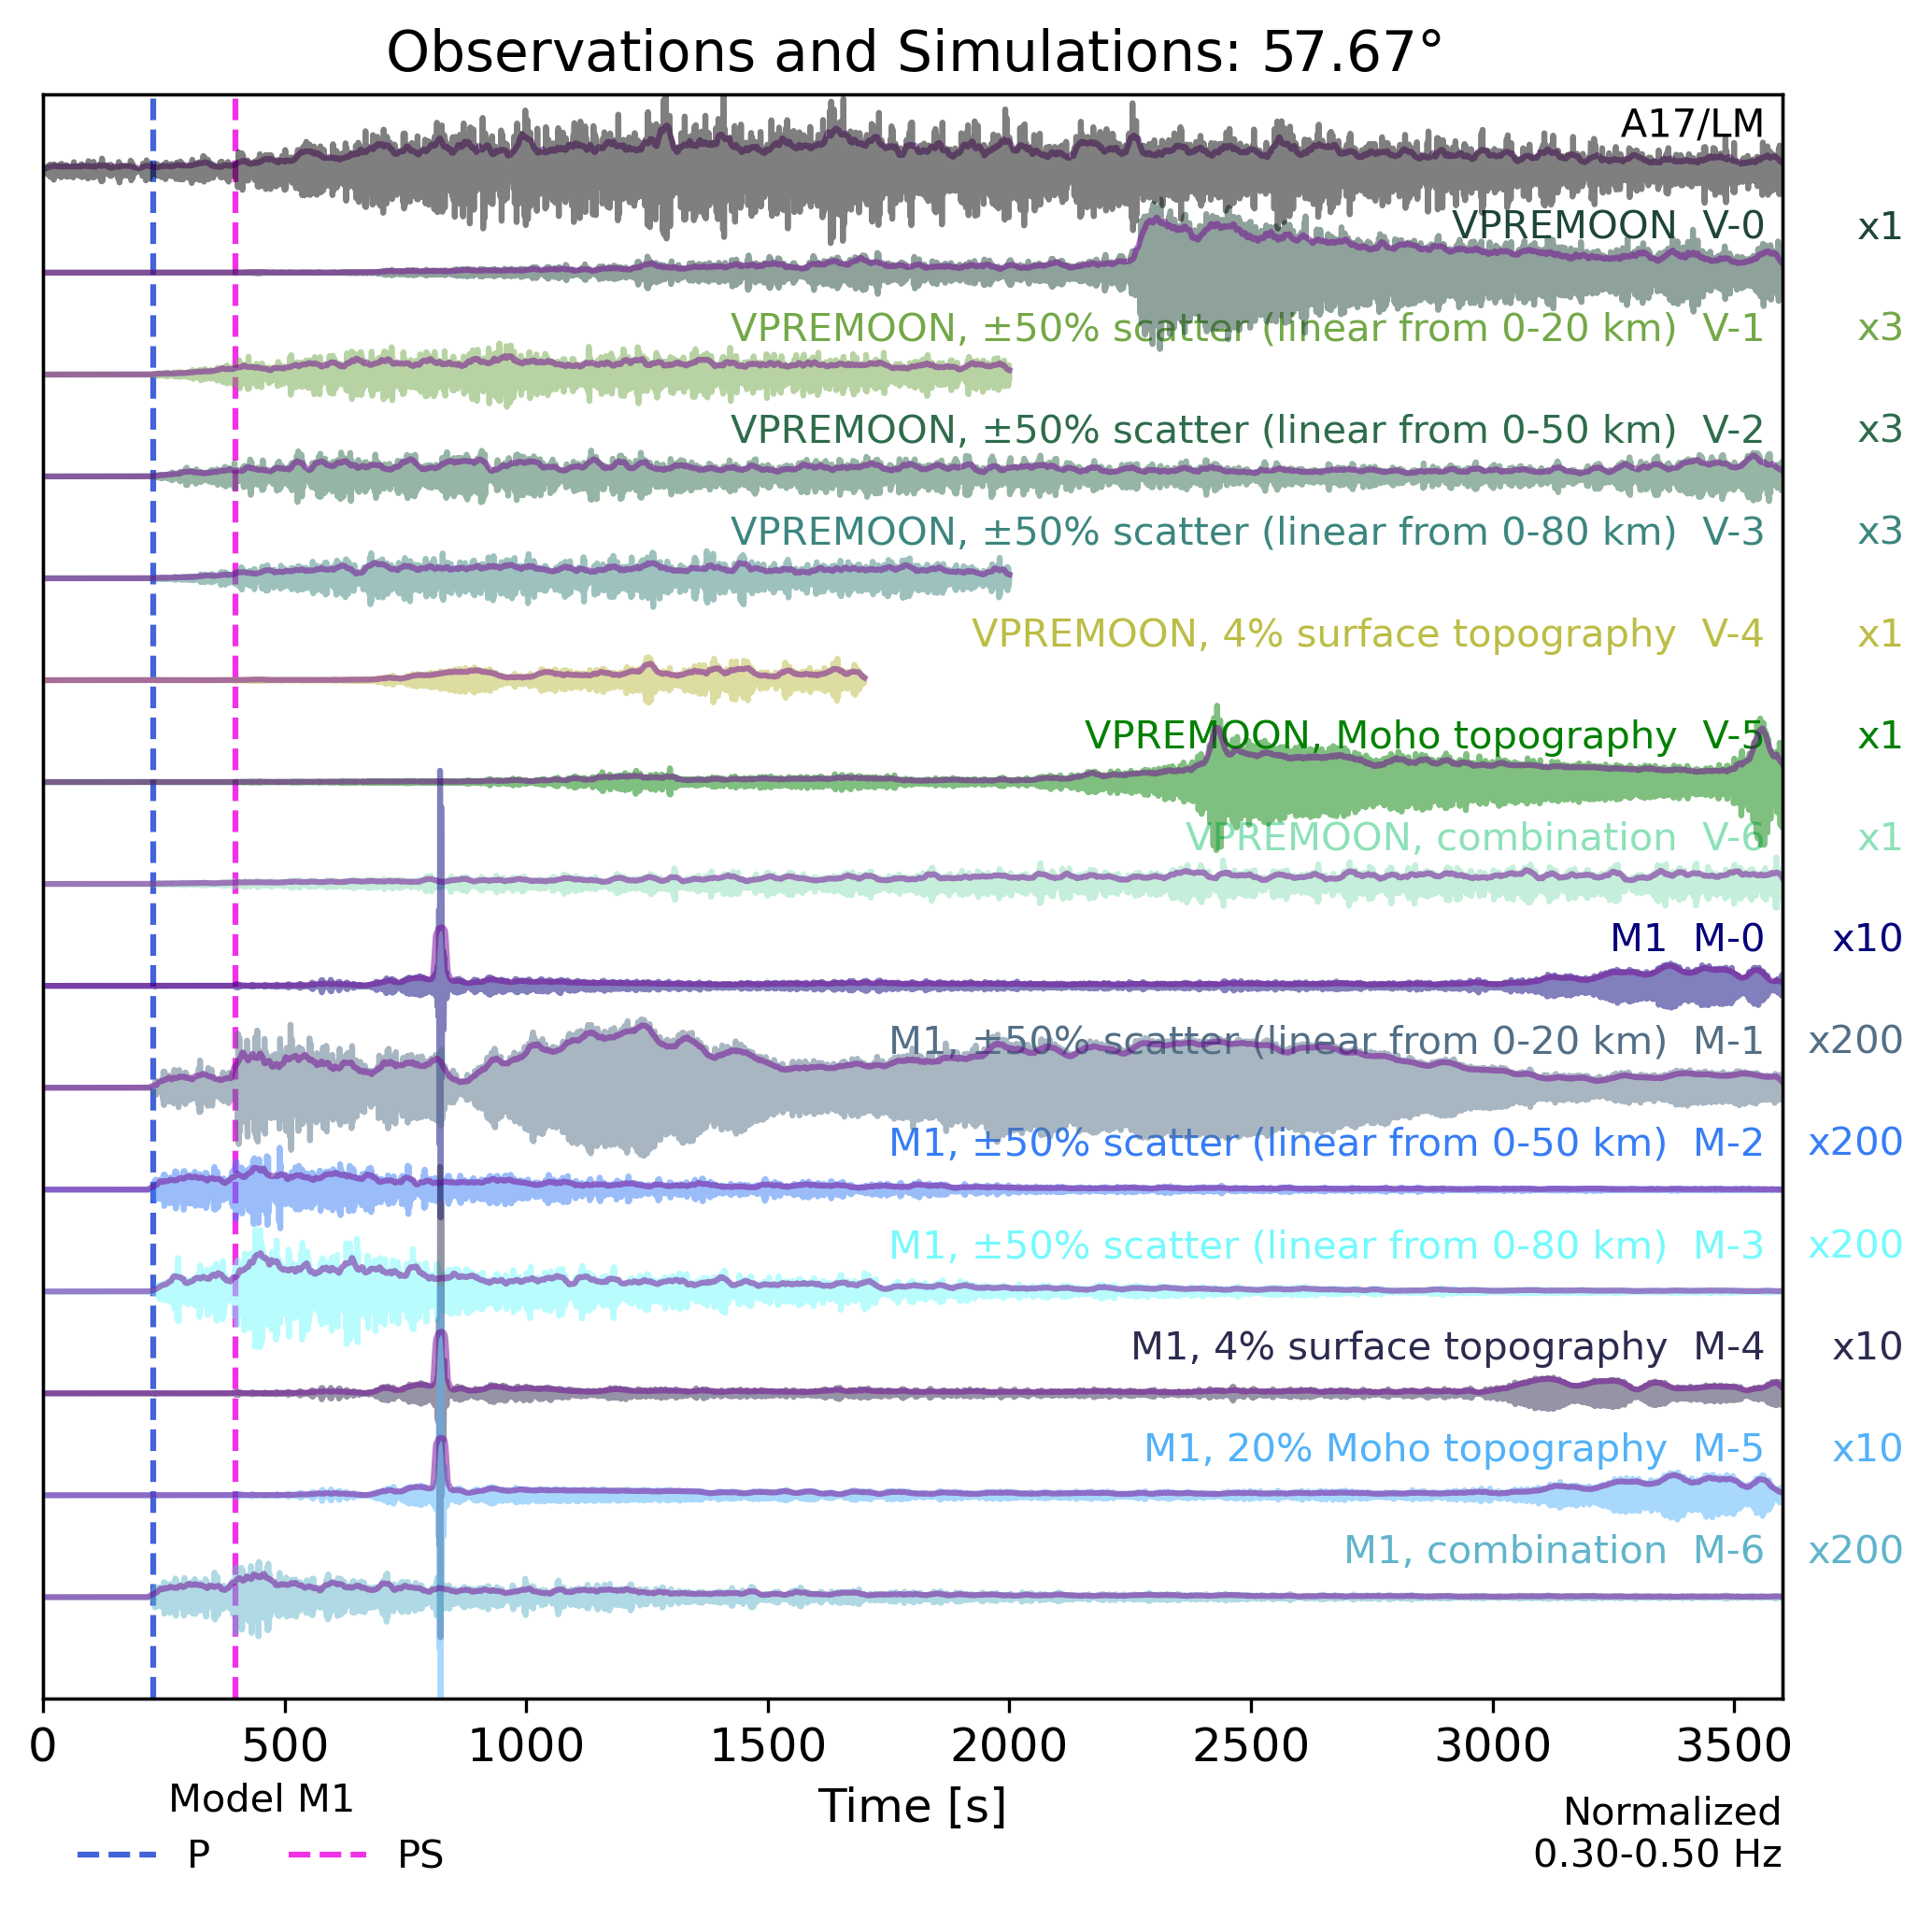

Calculated using model :  Model M1
Observations: smooth_periods=10, smooth_kernel_size=166 smoothing length=25.1 s
0 0.026947346151190456
Simulation: 120_VPREMOON_atten_explosion_2, smooth_periods=10, smooth_kernel_size=103 smoothing length=25.1 s
plot envelope  1.0
1 0.0036930445741152687
Simulation: 127w_VPREMOON_atten_linear20_2, smooth_periods=10, smooth_kernel_size=114 smoothing length=27.7 s
plot envelope  1.0
2 0.01178317676661714
Simulation: 126w_VPREMOON_atten_linear50_2, smooth_periods=10, smooth_kernel_size=108 smoothing length=26.3 s
plot envelope  1.0
3 0.005073886445669444
Simulation: 124w_VPREMOON_atten_linear80_2, smooth_periods=10, smooth_kernel_size=111 smoothing length=27.0 s
plot envelope  1.0
4 0.008827986419620392
Simulation: 128b_VPREMOON_atten_surface_2, smooth_periods=10, smooth_kernel_size=102 smoothing length=24.8 s
plot envelope  1.0
5 0.03664066121383357
Simulation: 125_VPREMOON_atten_Moho_2, smooth_periods=10, smooth_kernel_size=102 smoothing length=24.8 s

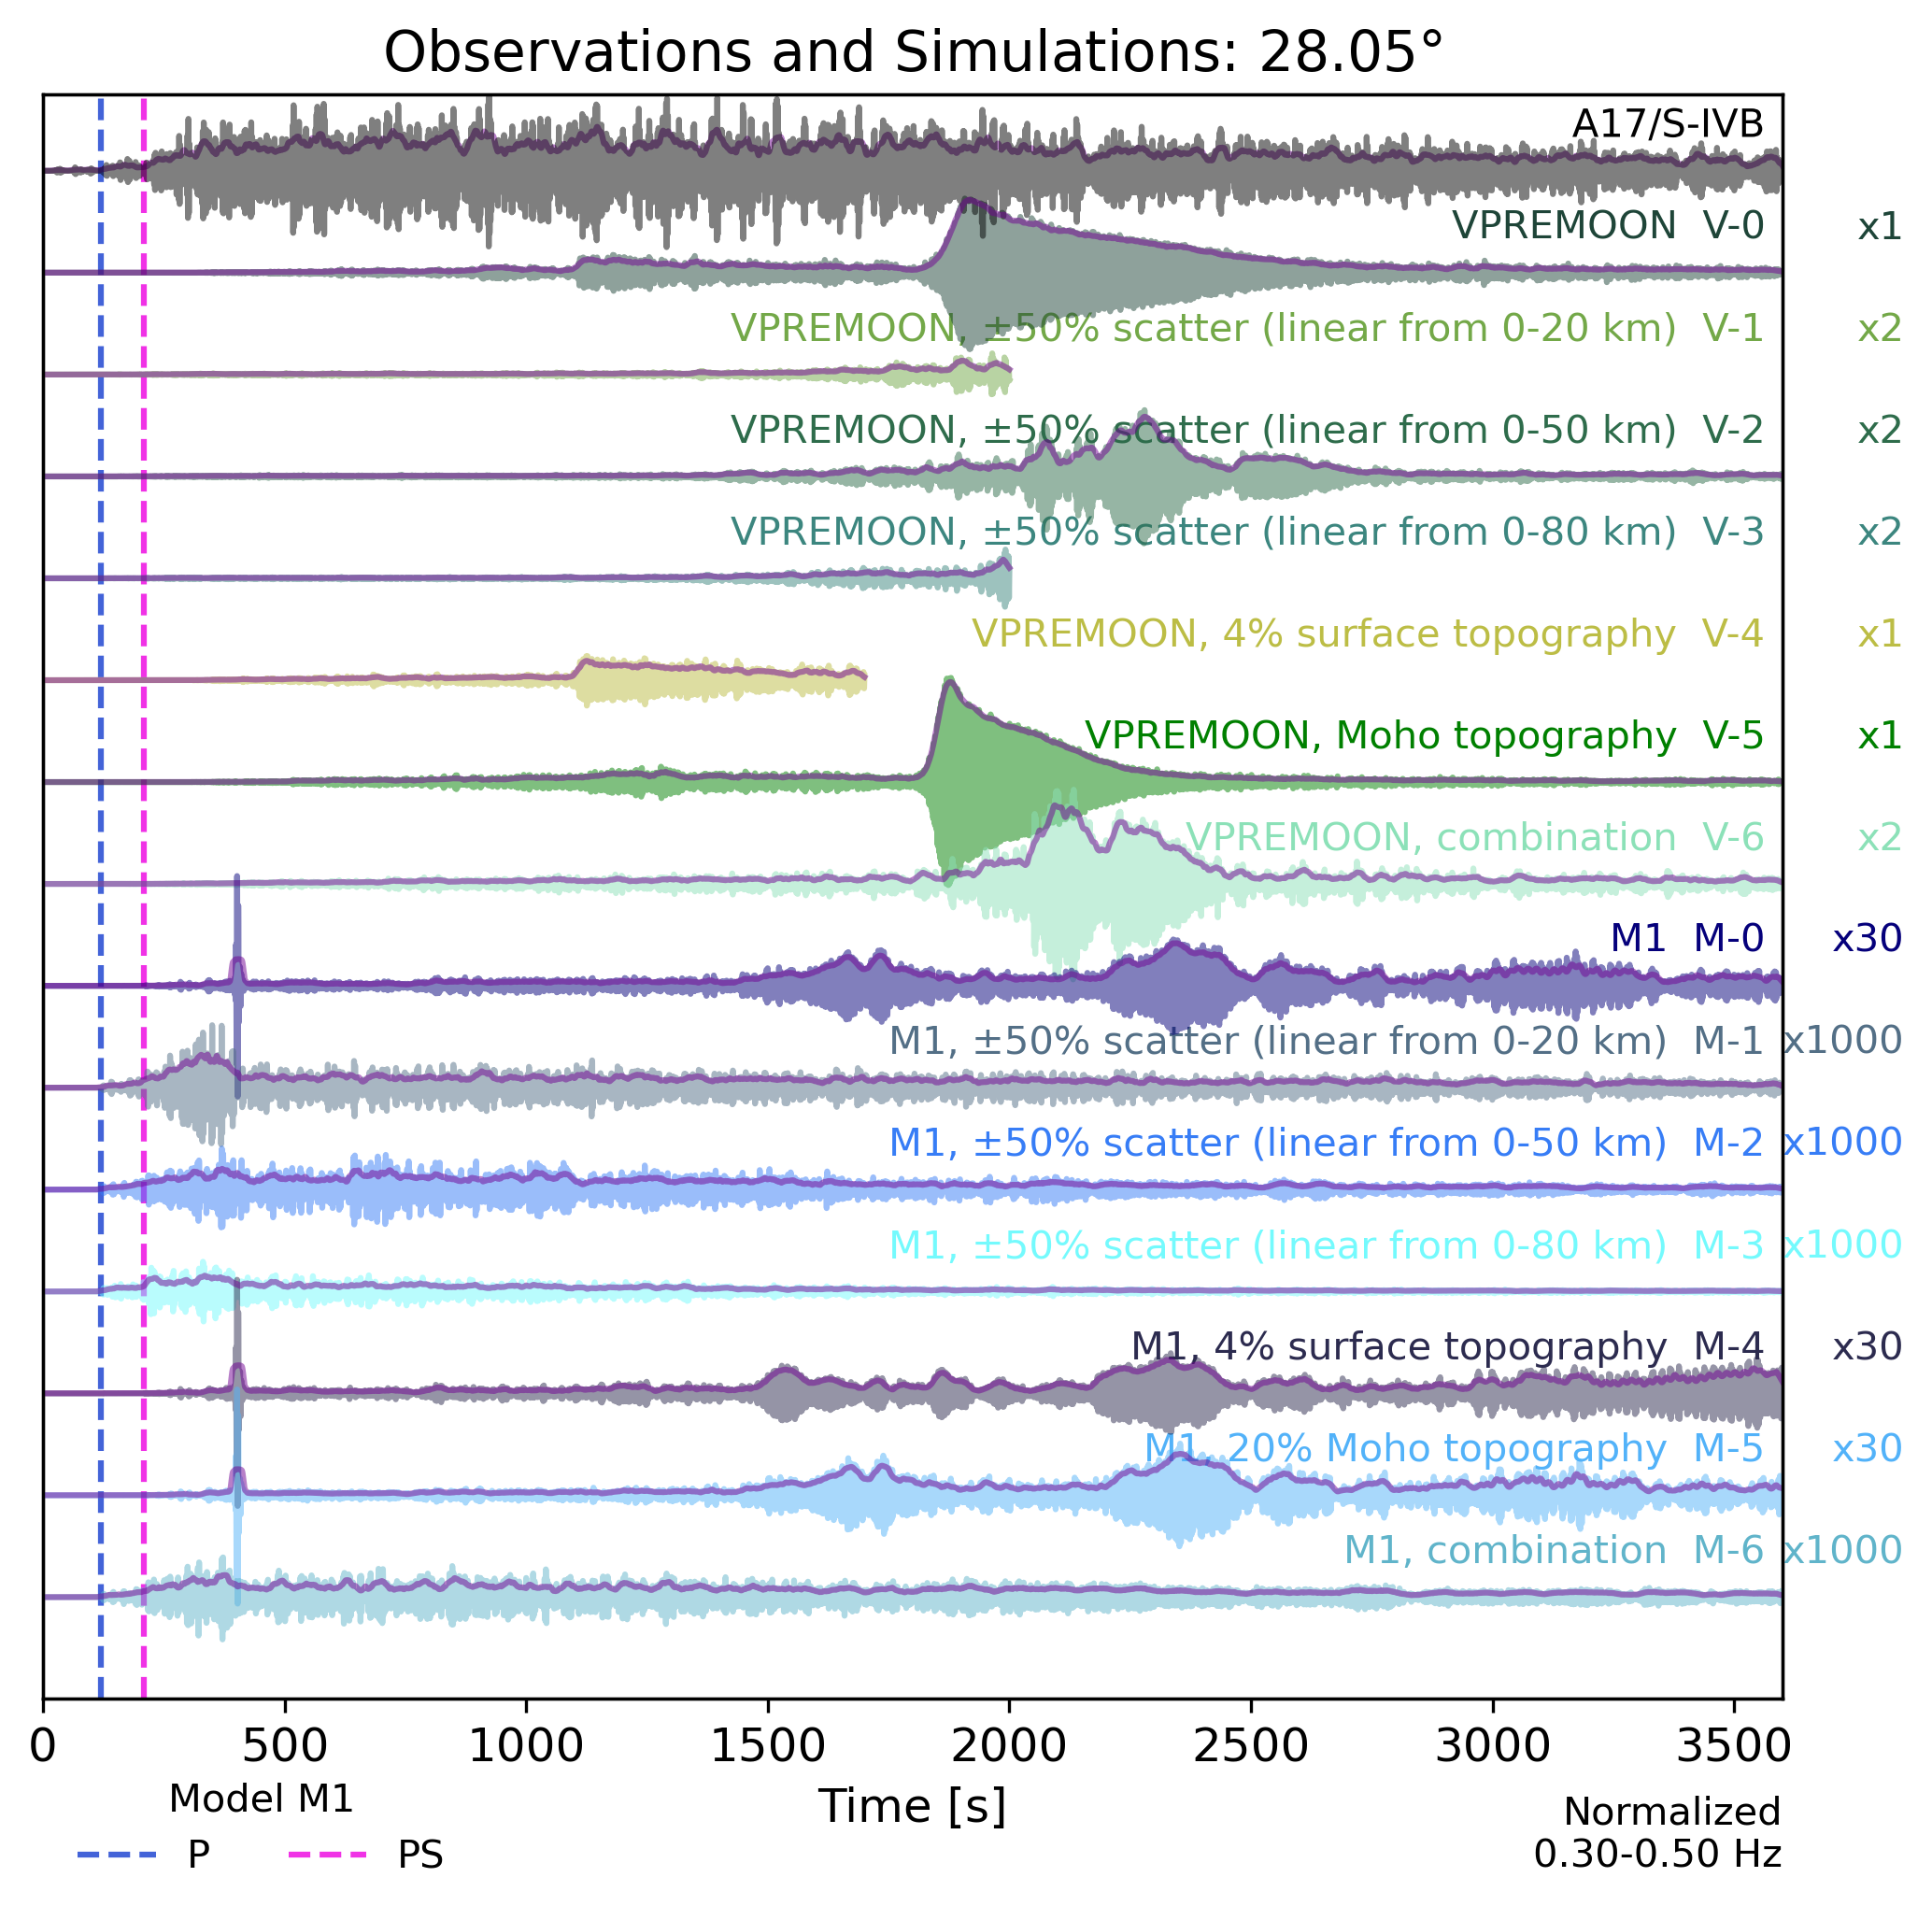

Calculated using model :  Model M1
Observations: smooth_periods=10, smooth_kernel_size=166 smoothing length=25.1 s
0 0.471055956010877
Simulation: 120_VPREMOON_atten_explosion_2, smooth_periods=10, smooth_kernel_size=103 smoothing length=25.1 s
plot envelope  1.0
1 0.6949735181416311
Simulation: 127w_VPREMOON_atten_linear20_2, smooth_periods=10, smooth_kernel_size=114 smoothing length=27.7 s
plot envelope  1.0
2 0.30588941345863885
Simulation: 126w_VPREMOON_atten_linear50_2, smooth_periods=10, smooth_kernel_size=108 smoothing length=26.3 s
plot envelope  1.0
3 0.1591223553168161
Simulation: 124w_VPREMOON_atten_linear80_2, smooth_periods=10, smooth_kernel_size=111 smoothing length=27.0 s
plot envelope  1.0
4 0.7017533305821889
Simulation: 128b_VPREMOON_atten_surface_2, smooth_periods=10, smooth_kernel_size=102 smoothing length=24.8 s
plot envelope  1.0
5 0.5543281359044001
Simulation: 125_VPREMOON_atten_Moho_2, smooth_periods=10, smooth_kernel_size=102 smoothing length=24.8 s
plot envel

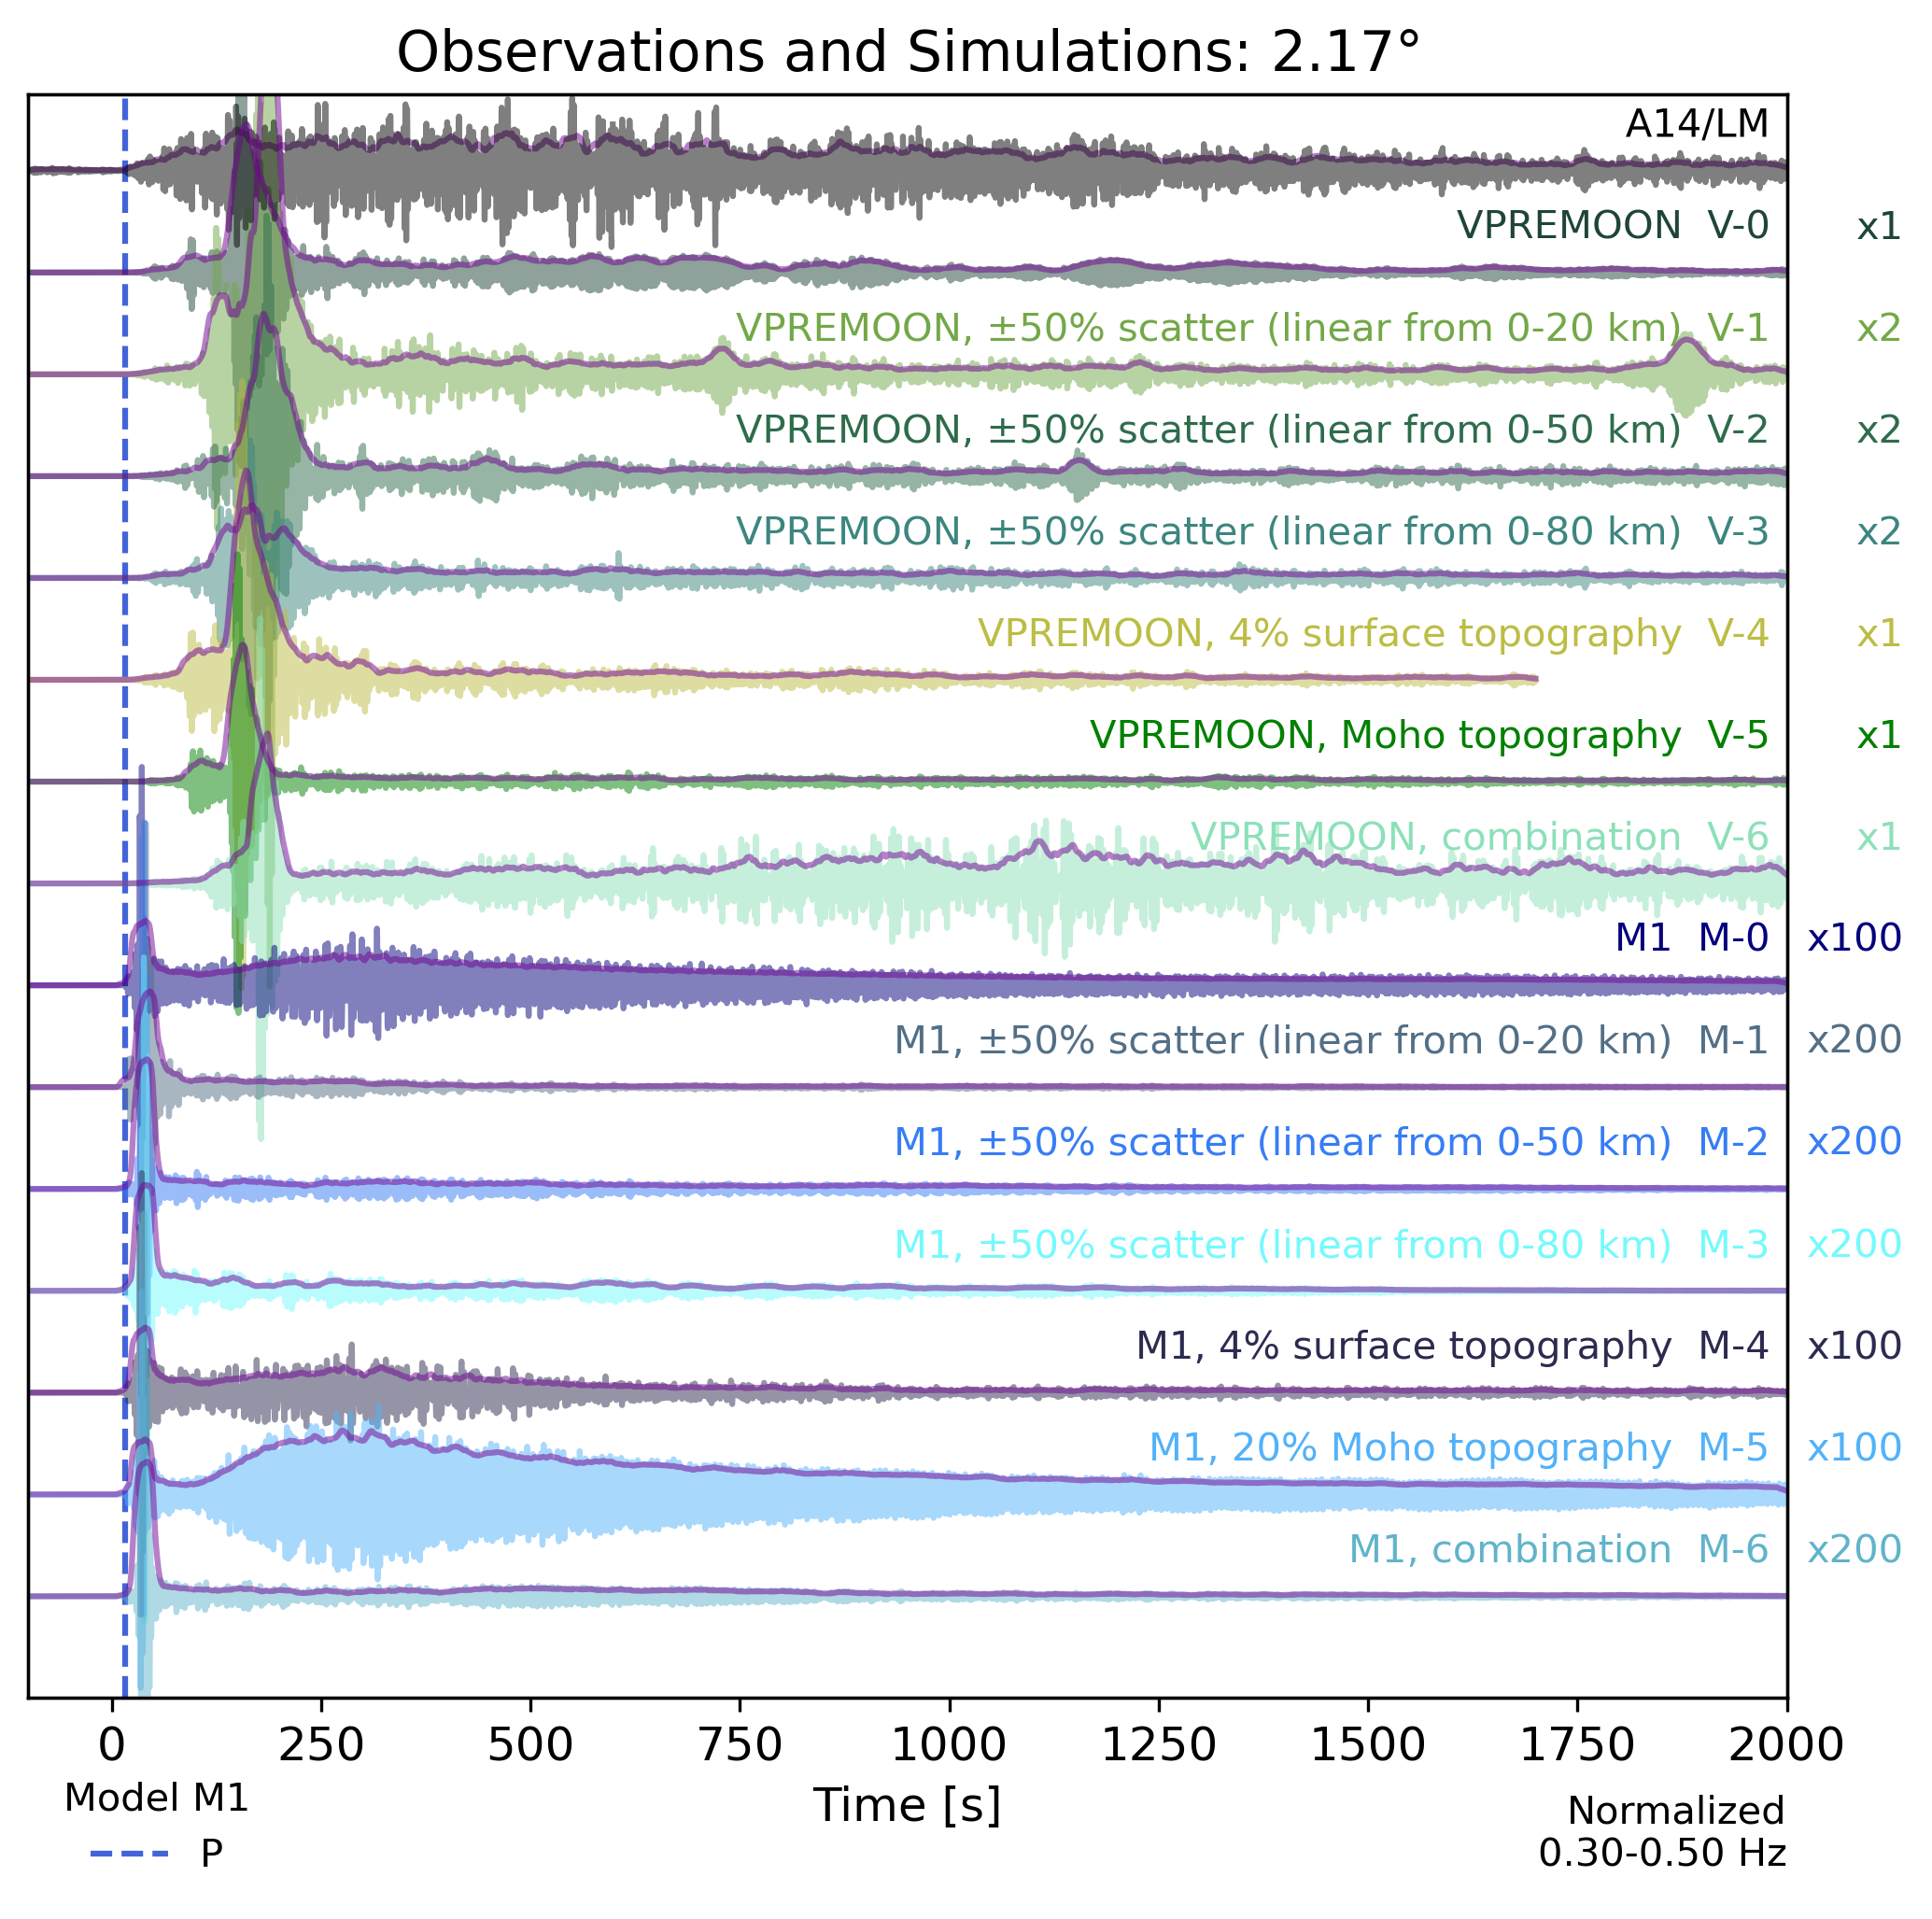

14 Trace(s) in Stream:
LM.LM14S14..Z | 1969-12-31T23:58:20.046640Z - 1970-01-01T00:33:20.000080Z | 4.1 Hz, 8630 samples
LM.LM14S14..Z | 1969-12-31T23:58:20.008380Z - 1970-01-01T00:33:20.081064Z | 4.5 Hz, 9548 samples
LM.LM14S14..Z | 1969-12-31T23:58:20.095481Z - 1970-01-01T00:33:20.096417Z | 4.3 Hz, 9030 samples
LM.LM14S14..Z | 1969-12-31T23:58:20.058221Z - 1970-01-01T00:33:19.999414Z | 4.4 Hz, 9258 samples
LM.LM14S14..Z | 1969-12-31T23:58:20.077046Z - 1970-01-01T00:28:20.100428Z | 4.0 Hz, 7282 samples
LM.LM14S14..Z | 1969-12-31T23:58:19.992062Z - 1970-01-01T00:33:19.936622Z | 4.1 Hz, 8509 samples
LM.LM14S14..Z | 1969-12-31T23:58:19.916665Z - 1970-01-01T00:33:20.109551Z | 4.0 Hz, 8439 samples
LM.LM14S14..Z | 1969-12-31T23:58:19.913500Z - 1970-01-01T00:33:20.002750Z | 4.1 Hz, 8512 samples
LM.LM14S14..Z | 1969-12-31T23:58:19.913500Z - 1970-01-01T00:33:20.002750Z | 4.1 Hz, 8512 samples
LM.LM14S14..Z | 1969-12-31T23:58:19.913500Z - 1970-01-01T00:33:20.002750Z | 4.1 Hz, 8512 samples
LM.LM14

In [43]:
# Figure 9, 10 and 11 - Compare simulations with observations


run_list = [
'120_VPREMOON_atten_explosion_2', # VPREMOON
'127w_VPREMOON_atten_linear20_2', # VPREMOON, ±50% scatter (linear from 0-20 km)
'126w_VPREMOON_atten_linear50_2', # VPREMOON, ±50% scatter (linear from 0-50 km)
'124w_VPREMOON_atten_linear80_2', # VPREMOON, ±50% scatter (linear from 0-80 km)
'128b_VPREMOON_atten_surface_2', # VPREMOON, 4% surface topography
'125_VPREMOON_atten_Moho_2', # VPREMOON, Moho topography
'152we_VPREMOON_atten_combi_50_2', # VPREMOON, 4% surface, Moho, ±50% scatter (linear from 0-50 km)

'141_ISSI_atten_explosion_2', # M1
'146we_ISSI_atten_linear20_2', # M1, ±50% scatter (linear from 0-20 km)
'145we_ISSI_atten_linear50_2', # M1, ±50% scatter (linear from 0-50 km)
'140we_ISSI_atten_linear80_2', # M1, ±50% scatter (linear from 0-80 km)
'148_ISSI_atten_surface_2', # M1, 4% surface topography
'147_ISSI_atten_Moho_2', # M1, 20% Moho topography
'166w_ISSI_atten_combi_50_nr_100_constant_2' #M1, surface, 20% Moho, ±50% scatter (linear from 0-50 km)
]

freqmin=0.3
freqmax=0.5

#2, 5, 25, 34, 57

scale_list = [
1.5,   # observation
1.5,   # '120_VPREMOON_atten_explosion_2', # VPREMOON
0.6346,   # '127w_VPREMOON_atten_linear20_2', # VPREMOON, ±50% scatter (linear from 0-20 km)
0.5085,   # '126w_VPREMOON_atten_linear50_2', # VPREMOON, ±50% scatter (linear from 0-50 km)
0.5625,   # '124w_VPREMOON_atten_linear80_2', # VPREMOON, ±50% scatter (linear from 0-80 km)
0.4500,   # '128b_VPREMOON_atten_surface_2', # VPREMOON, 4% surface topography
1.5,   # '125_VPREMOON_atten_Moho_2', # VPREMOON, Moho topography
0.5214,   # '152we_VPREMOON_atten_combi_50_2', # VPREMOON, 4% surface, Moho, ±50% scatter (linear from 0-50 km)

4.55,   # '141_ISSI_atten_explosion_2', # M1
1.3396,   # '146we_ISSI_atten_linear20_2', # M1, ±50% scatter (linear from 0-20 km)
0.8225,   # '145we_ISSI_atten_linear50_2', # M1, ±50% scatter (linear from 0-50 km)
1.2211,   # '140we_ISSI_atten_linear80_2', # M1, ±50% scatter (linear from 0-80 km)
4.79,   # '148_ISSI_atten_surface_2', # M1, 4% surface topography
4.44,   # '147_ISSI_atten_Moho_2', # M1, 20% Moho topography
0.7722,   # '166w_ISSI_atten_combi_50_nr_100_constant_2' #M1, surface, 20% Moho, ±50% scatter (linear from 0-50 km)
             ] 

plot_envelope_taup(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=original_observation_stream_local_MH,distance_in_degree=distance_examples[57],
                   inv=inv,
                    model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                         title=None,freqmin=freqmin,freqmax=freqmax,
                         startsecond=0, endsecond=3600,channel='Z',
                              normalize='relative', scale_list=scale_list, phase_list=["P","PS"], 
                              smooth_periods=10,plot_seismogram=True,taup_show=True,plot_envelope_one_color=True,plot_derivative=False,
                              annotate_relative=True,
                              save_fig=True,figsize=(7,7 )
                             )

scale_list = [
1.5,   # observation
1.5,   # '120_VPREMOON_atten_explosion_2', # VPREMOON
0.4155,   # '127w_VPREMOON_atten_linear20_2', # VPREMOON, ±50% scatter (linear from 0-20 km)
1.3158,   # '126w_VPREMOON_atten_linear50_2', # VPREMOON, ±50% scatter (linear from 0-50 km)
0.5639,   # '124w_VPREMOON_atten_linear80_2', # VPREMOON, ±50% scatter (linear from 0-80 km)
0.5,   # '128b_VPREMOON_atten_surface_2', # VPREMOON, 4% surface topography
2.0453,   # '125_VPREMOON_atten_Moho_2', # VPREMOON, Moho topography
1.8750,   # '152we_VPREMOON_atten_combi_50_2', # VPREMOON, 4% surface, Moho, ±50% scatter (linear from 0-50 km)

2.1739,   # '141_ISSI_atten_explosion_2', # M1
1.2274,   # '146we_ISSI_atten_linear20_2', # M1, ±50% scatter (linear from 0-20 km)
0.8061,   # '145we_ISSI_atten_linear50_2', # M1, ±50% scatter (linear from 0-50 km)
0.5889,   # '140we_ISSI_atten_linear80_2', # M1, ±50% scatter (linear from 0-80 km)
2.2305,   # '148_ISSI_atten_surface_2', # M1, 4% surface topography
2.1277,   # '147_ISSI_atten_Moho_2', # M1, 20% Moho topography
0.8300,   # '166w_ISSI_atten_combi_50_nr_100_constant_2' #M1, surface, 20% Moho, ±50% scatter (linear from 0-50 km)
             ] 

plot_envelope_taup(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=original_observation_stream_local_MH,distance_in_degree=distance_examples[28],
                   inv=inv,
                   model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                         title=None,freqmin=freqmin,freqmax=freqmax,
                         startsecond=0, endsecond=3600,channel='Z',
                              normalize='relative', scale_list=scale_list, phase_list=["P","PS"], 
                              smooth_periods=10,plot_seismogram=True,taup_show=True,plot_envelope=False,plot_envelope_one_color=True,plot_derivative=False,
                                           annotate_relative=True,
                           save_fig=True,figsize=(7,7 )
                             )

scale_list = [
1.5,   # observation
4,   # '120_VPREMOON_atten_explosion_2', # VPREMOON
12.0301,   # '127w_VPREMOON_atten_linear20_2', # VPREMOON, ±50% scatter (linear from 0-20 km)
5.2083,   # '126w_VPREMOON_atten_linear50_2', # VPREMOON, ±50% scatter (linear from 0-50 km)
2.7027,   # '124w_VPREMOON_atten_linear80_2', # VPREMOON, ±50% scatter (linear from 0-80 km)
6.0606,   # '128b_VPREMOON_atten_surface_2', # VPREMOON, 4% surface topography
4.5455,   # '125_VPREMOON_atten_Moho_2', # VPREMOON, Moho topography
5.2083,   # '152we_VPREMOON_atten_combi_50_2', # VPREMOON, 4% surface, Moho, ±50% scatter (linear from 0-50 km)

4.4106,   # '141_ISSI_atten_explosion_2', # M1
5.1816,   # '146we_ISSI_atten_linear20_2', # M1, ±50% scatter (linear from 0-20 km)
8.3597,   # '145we_ISSI_atten_linear50_2', # M1, ±50% scatter (linear from 0-50 km)
6.5506,   # '140we_ISSI_atten_linear80_2', # M1, ±50% scatter (linear from 0-80 km)
4.3668,   # '148_ISSI_atten_surface_2', # M1, 4% surface topography
3.9880,   # '147_ISSI_atten_Moho_2', # M1, 20% Moho topography
8.7402,   # '166w_ISSI_atten_combi_50_nr_100_constant_2' #M1, surface, 20% Moho, ±50% scatter (linear from 0-50 km)
             ] 

plot_envelope_taup(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=original_observation_stream_local_MH,distance_in_degree=distance_examples[2],
                   inv=inv,
                   model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                         title=None,freqmin=freqmin,freqmax=freqmax,
                         startsecond=-100, endsecond=2000,channel='Z',
    
                              normalize='relative', scale_list=scale_list, phase_list=["P"],
                              smooth_periods=10,plot_seismogram=True,taup_show=True,plot_envelope=False,plot_envelope_one_color=True,plot_derivative=False,
                              annotate_relative=True,
                              save_fig=True,figsize=(7,7 )
                             )




Calculated using model :  Model M1
Observations: smooth_periods=10, smooth_kernel_size=884 smoothing length=133.4 s
0 0.01935147096864843
Simulation: 120_VPREMOON_atten_explosion_2, smooth_periods=10, smooth_kernel_size=548 smoothing length=133.4 s
plot envelope  1.0
1 0.0007057939849312144
Simulation: 127w_VPREMOON_atten_linear20_2, smooth_periods=10, smooth_kernel_size=607 smoothing length=147.7 s
plot envelope  1.0
2 0.0005403695666168676
Simulation: 126w_VPREMOON_atten_linear50_2, smooth_periods=10, smooth_kernel_size=574 smoothing length=139.7 s
plot envelope  1.0
3 0.0002144321146649368
Simulation: 124w_VPREMOON_atten_linear80_2, smooth_periods=10, smooth_kernel_size=588 smoothing length=143.1 s
plot envelope  1.0
4 0.006839821672932601
Simulation: 128b_VPREMOON_atten_surface_2, smooth_periods=10, smooth_kernel_size=540 smoothing length=131.4 s
plot envelope  1.0
5 0.023053156184811678
Simulation: 125_VPREMOON_atten_Moho_2, smooth_periods=10, smooth_kernel_size=541 smoothing leng

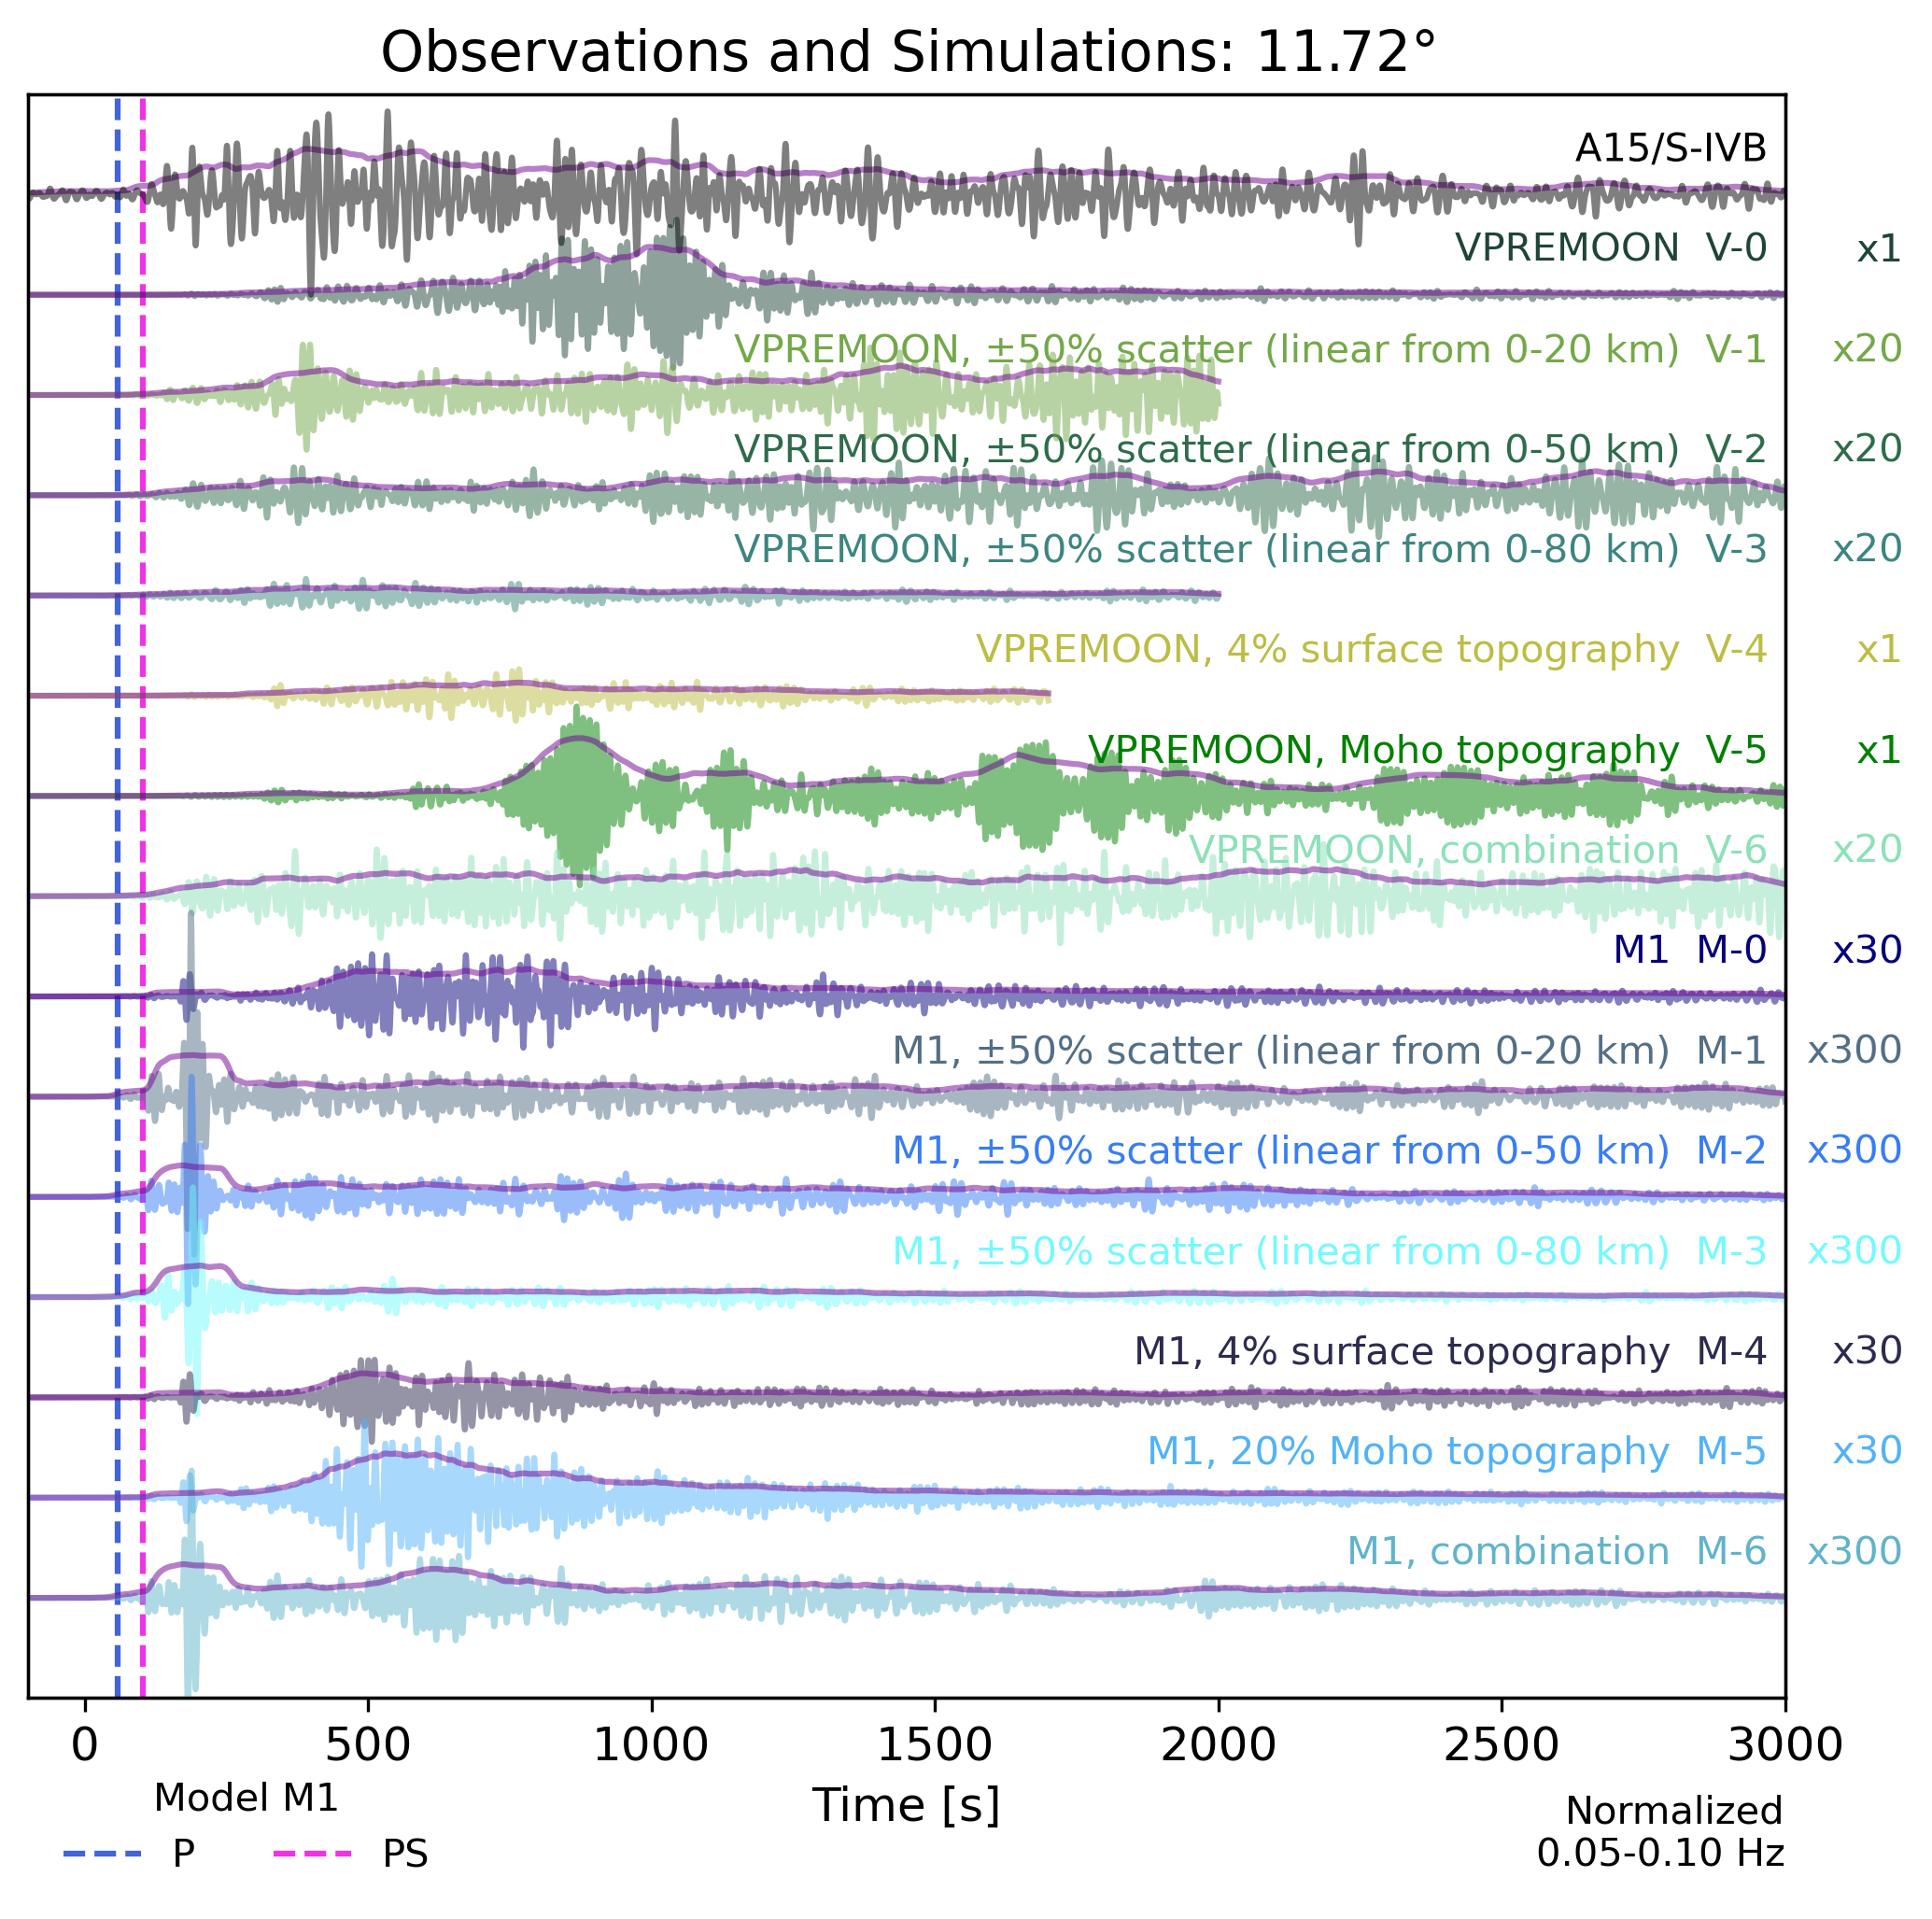

14 Trace(s) in Stream:
SB.SB15S12..Z | 1969-12-31T23:58:20.046640Z - 1970-01-01T00:49:59.966320Z | 4.1 Hz, 12739 samples
SB.SB15S12..Z | 1969-12-31T23:58:20.008380Z - 1970-01-01T00:33:20.081064Z | 4.5 Hz, 9548 samples
SB.SB15S12..Z | 1969-12-31T23:58:20.095481Z - 1970-01-01T00:49:59.975033Z | 4.3 Hz, 13329 samples
SB.SB15S12..Z | 1969-12-31T23:58:20.058221Z - 1970-01-01T00:33:19.999414Z | 4.4 Hz, 9258 samples
SB.SB15S12..Z | 1969-12-31T23:58:20.077046Z - 1970-01-01T00:28:20.100428Z | 4.0 Hz, 7282 samples
SB.SB15S12..Z | 1969-12-31T23:58:19.992062Z - 1970-01-01T00:50:00.051262Z | 4.1 Hz, 12561 samples
SB.SB15S12..Z | 1969-12-31T23:58:19.916665Z - 1970-01-01T00:49:59.928800Z | 4.0 Hz, 12456 samples
SB.SB15S12..Z | 1969-12-31T23:58:19.913500Z - 1970-01-01T00:50:00.080500Z | 4.1 Hz, 12565 samples
SB.SB15S12..Z | 1969-12-31T23:58:19.913500Z - 1970-01-01T00:50:00.080500Z | 4.1 Hz, 12565 samples
SB.SB15S12..Z | 1969-12-31T23:58:19.913500Z - 1970-01-01T00:50:00.080500Z | 4.1 Hz, 12565 samples


In [42]:
# Figure 12 - Comparing observations with simulations at lower frequencies

run_list = [
'120_VPREMOON_atten_explosion_2', # VPREMOON
'127w_VPREMOON_atten_linear20_2', # VPREMOON, ±50% scatter (linear from 0-20 km)
'126w_VPREMOON_atten_linear50_2', # VPREMOON, ±50% scatter (linear from 0-50 km)
'124w_VPREMOON_atten_linear80_2', # VPREMOON, ±50% scatter (linear from 0-80 km)
'128b_VPREMOON_atten_surface_2', # VPREMOON, 4% surface topography
'125_VPREMOON_atten_Moho_2', # VPREMOON, Moho topography
'152we_VPREMOON_atten_combi_50_2', # VPREMOON, 4% surface, Moho, ±50% scatter (linear from 0-50 km)

'141_ISSI_atten_explosion_2', # M1
'146we_ISSI_atten_linear20_2', # M1, ±50% scatter (linear from 0-20 km)
'145we_ISSI_atten_linear50_2', # M1, ±50% scatter (linear from 0-50 km)
'140we_ISSI_atten_linear80_2', # M1, ±50% scatter (linear from 0-80 km)
'148_ISSI_atten_surface_2', # M1, 4% surface topography
'147_ISSI_atten_Moho_2', # M1, 20% Moho topography
'166w_ISSI_atten_combi_50_nr_100_constant_2' #M1, surface, 20% Moho, ±50% scatter (linear from 0-50 km)
]

freqmin=0.05
freqmax=0.1

scale_list = [
2,   # observation
1.5,   # '120_VPREMOON_atten_explosion_2', # VPREMOON
1.0941710623569862,   # '127w_VPREMOON_atten_linear20_2', # VPREMOON, ±50% scatter (linear from 0-20 km)
0.8377185912517875,   # '126w_VPREMOON_atten_linear50_2', # VPREMOON, ±50% scatter (linear from 0-50 km)
0.33242762012098365,   # '124w_VPREMOON_atten_linear80_2', # VPREMOON, ±50% scatter (linear from 0-80 km)
0.5301784306743828,   # '128b_VPREMOON_atten_surface_2', # VPREMOON, 4% surface topography
1.7869305301514593,   # '125_VPREMOON_atten_Moho_2', # VPREMOON, Moho topography
1.0447556953113941,   # '152we_VPREMOON_atten_combi_50_2', # VPREMOON, 4% surface, Moho, ±50% scatter (linear from 0-50 km)

1.0242111390135185,   # '141_ISSI_atten_explosion_2', # M1
3.6730577436935823,   # '146we_ISSI_atten_linear20_2', # M1, ±50% scatter (linear from 0-20 km)
2.398954993237981,   # '145we_ISSI_atten_linear50_2', # M1, ±50% scatter (linear from 0-50 km)
2.3344162159715838,   # '140we_ISSI_atten_linear80_2', # M1, ±50% scatter (linear from 0-80 km)
0.8878843984286713,   # '148_ISSI_atten_surface_2', # M1, 4% surface topography
1.5442242079731618,   # '147_ISSI_atten_Moho_2', # M1, 20% Moho topography
2.542361465364344,   # '166w_ISSI_atten_combi_50_nr_100_constant_2' #M1, surface, 20% Moho, ±50% scatter (linear from 0-50 km)
             ] 

plot_envelope_taup(original_stream=None,
                   original_stream_dict=original_stream_dict,run_list=run_list,
                   observation_stream=original_observation_stream_local_MH,distance_in_degree=11.718510058287118,
                   inv=inv,
                   model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                         title=None,freqmin=freqmin,freqmax=freqmax,
                         startsecond=-100, endsecond=3000,channel='Z',
    
                              normalize='relative', scale_list=scale_list, phase_list=["P","PS"],
                              smooth_periods=10,plot_seismogram=True,taup_show=True,plot_envelope=False,plot_envelope_one_color=True,plot_derivative=False,
                              annotate_relative=True,
                              save_fig=True,figsize=(7,7 )
                             )

45
Z
45 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.847250Z - 1970-01-01T01:00:09.799750Z | 4.1 Hz, 14631 samples
...
(43 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.847250Z - 1970-01-01T01:00:09.799750Z | 4.1 Hz, 14631 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872787086
L4 121.27245774557377
L8 242.54491549114792
L12 363.81737323672206
L16 485.08983098229584
L20 606.3622887278701
L24 727.6347464734438
L28 848.9072042190181
L32 970.1796619645919
L36 1091.4521197101662
L40 1212.7245774557402
L44 1333.9970352013142
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.8144084380358
event_depth=0
CURRENT RUN: 145we_ISSI_atten_linear50_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz
temp/fig_2024-09-12T00:50:29.613100Z.png


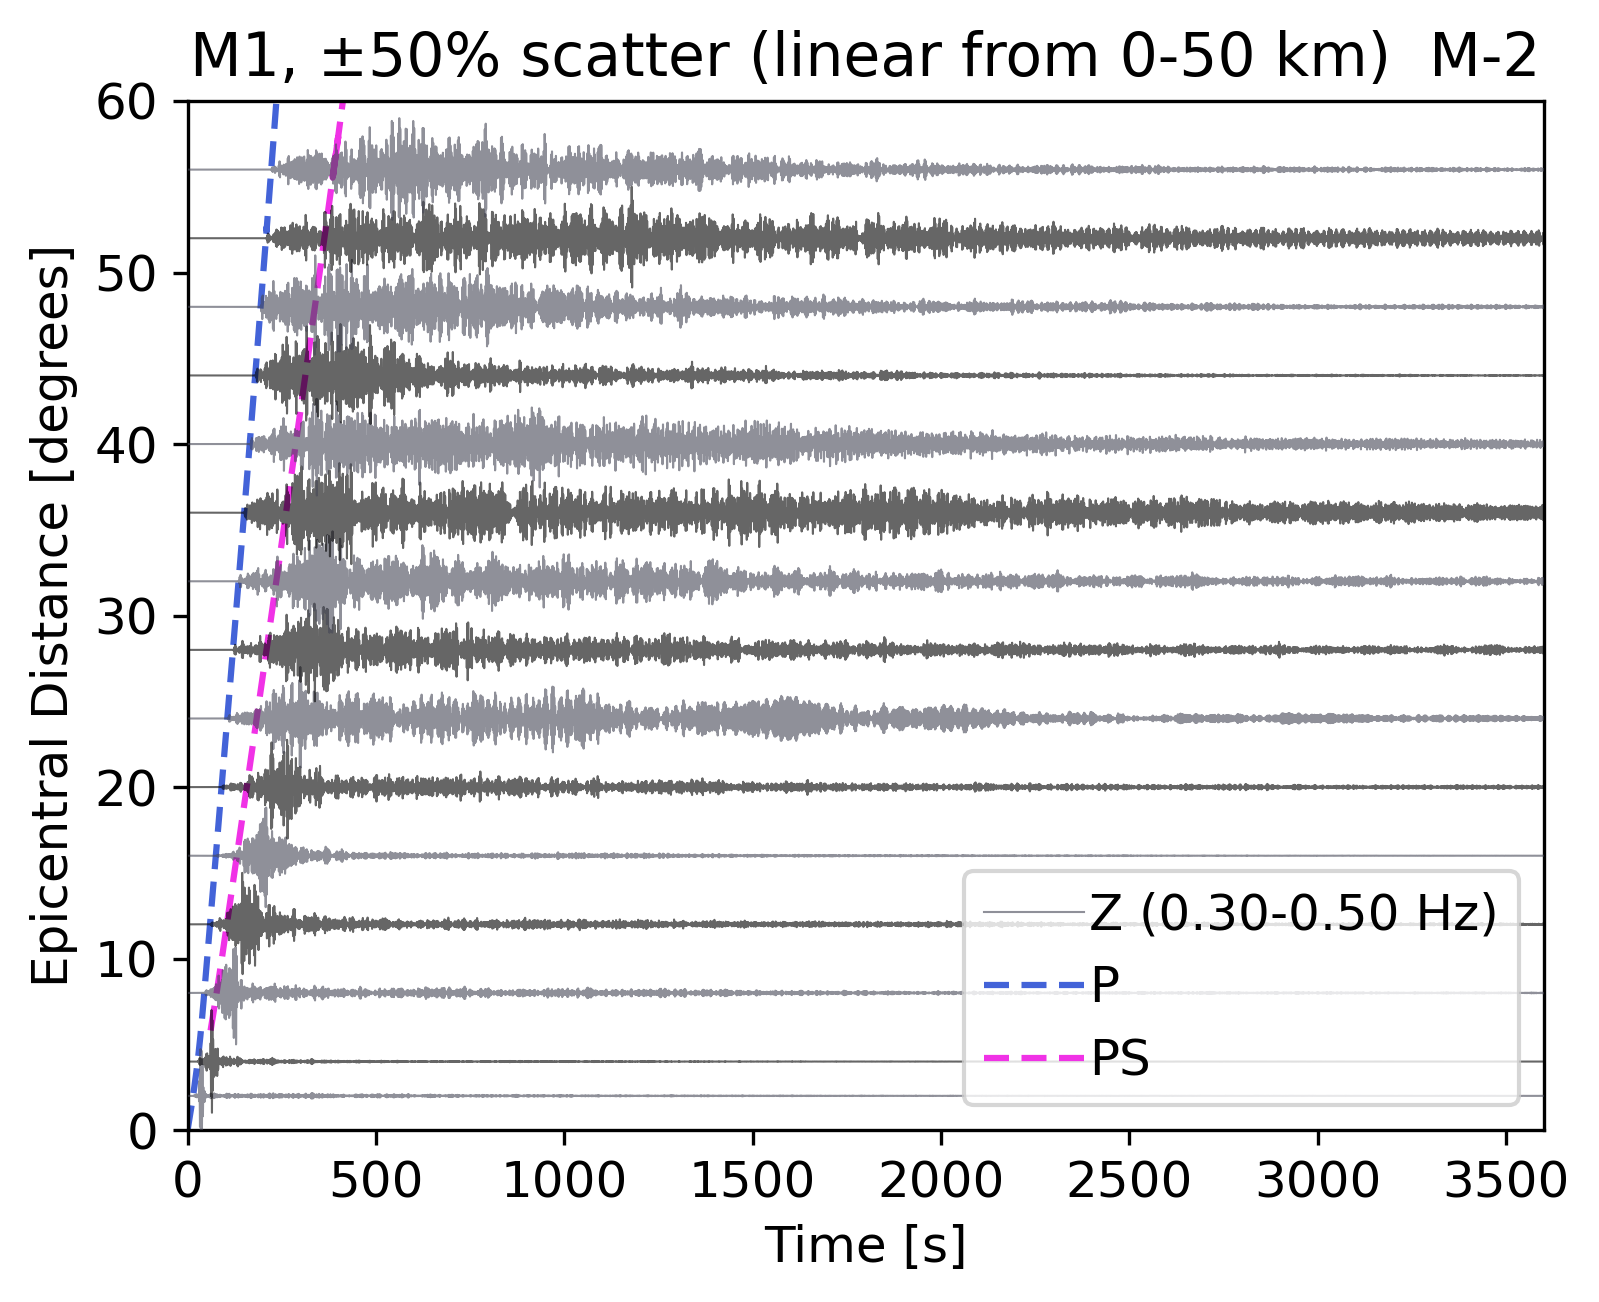

15 Trace(s) in Stream:
LO.L2..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L4..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L8..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L12..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L16..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L20..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L24..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L28..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L32..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L36..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L40..Z | 1970-01-01T00:00:00.09400

In [36]:
# Figure 13 - Simulations - 145we_ISSI_atten_linear50_2

############################################################################
# specify a run name
run = '145we_ISSI_atten_linear50_2'
run_title = "ISSI M1, ±50% scatter linear from 0 to 50 km, surface explosion"
short_title = "M1, ±50% scatter (linear from 0-50 km)  M-2"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))
            
scale_list = [
        2,4,3,1,1,
        1,1,1,0.8,1,
        1,1,1,1,1
             ]

scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]


plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=3,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=3600,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=["P","PS"], raw=False, 
#                               pre_filt_env=[[0.2,0.3,0.5,0.6]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=True,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',ncol=1
                             )